# Auswertung: Diodenlaser

In [397]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import configparser
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
import pandas as pd
from scipy.constants import e, c, h, nano
from scipy.signal import find_peaks

plt.rcParams['text.usetex'] = True #LaTeX

Daten für 20 Grad

In [398]:
I_raw_20 = np.array([10.14, 11.16, 12.17, 12.99, 14.02, 15.06, 16.02, 17.08, 18.15, 19.02, 20.03, 21.00, 22.11,
              23.16, 24.07, 25.01, 26.09, 27.06, 28.15, 29.00, 30.06, 31.09, 32.08, 33.12, 34.06, 35.01])
I_error_1_20 = np.full(26, 0.1)


#I_error
I_20 = I_raw_20 - 0.00572

P_20 = np.array([0.01257, 0.01370, 0.0148, 0.0158, 0.0167, 0.01930, 0.0214, 0.0243, 0.0283, 0.0338, 0.0450, 0.07980, 0.249,
              0.458, 0.618, 0.758, 0.891, 0.993, 1.105, 1.189, 1.283, 1.36, 1.42, 1.47, 1.51, 1.54])
P_error_1_20 = np.array([0.00005, 0.00010, 0.00010, 0.00010, 0.00010, 0.00010, 0.00010, 0.00010, 0.00010, 
                    0.00010, 0.00010, 0.00010, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 
                    0.001, 0.01, 0.01, 0.01, 0.01, 0.01])
P_error_2_20 = P_20 * 0.03

P_error_20 = np.sqrt(P_error_1_20**2 + P_error_2_20**2)


Plot für 20 Grad

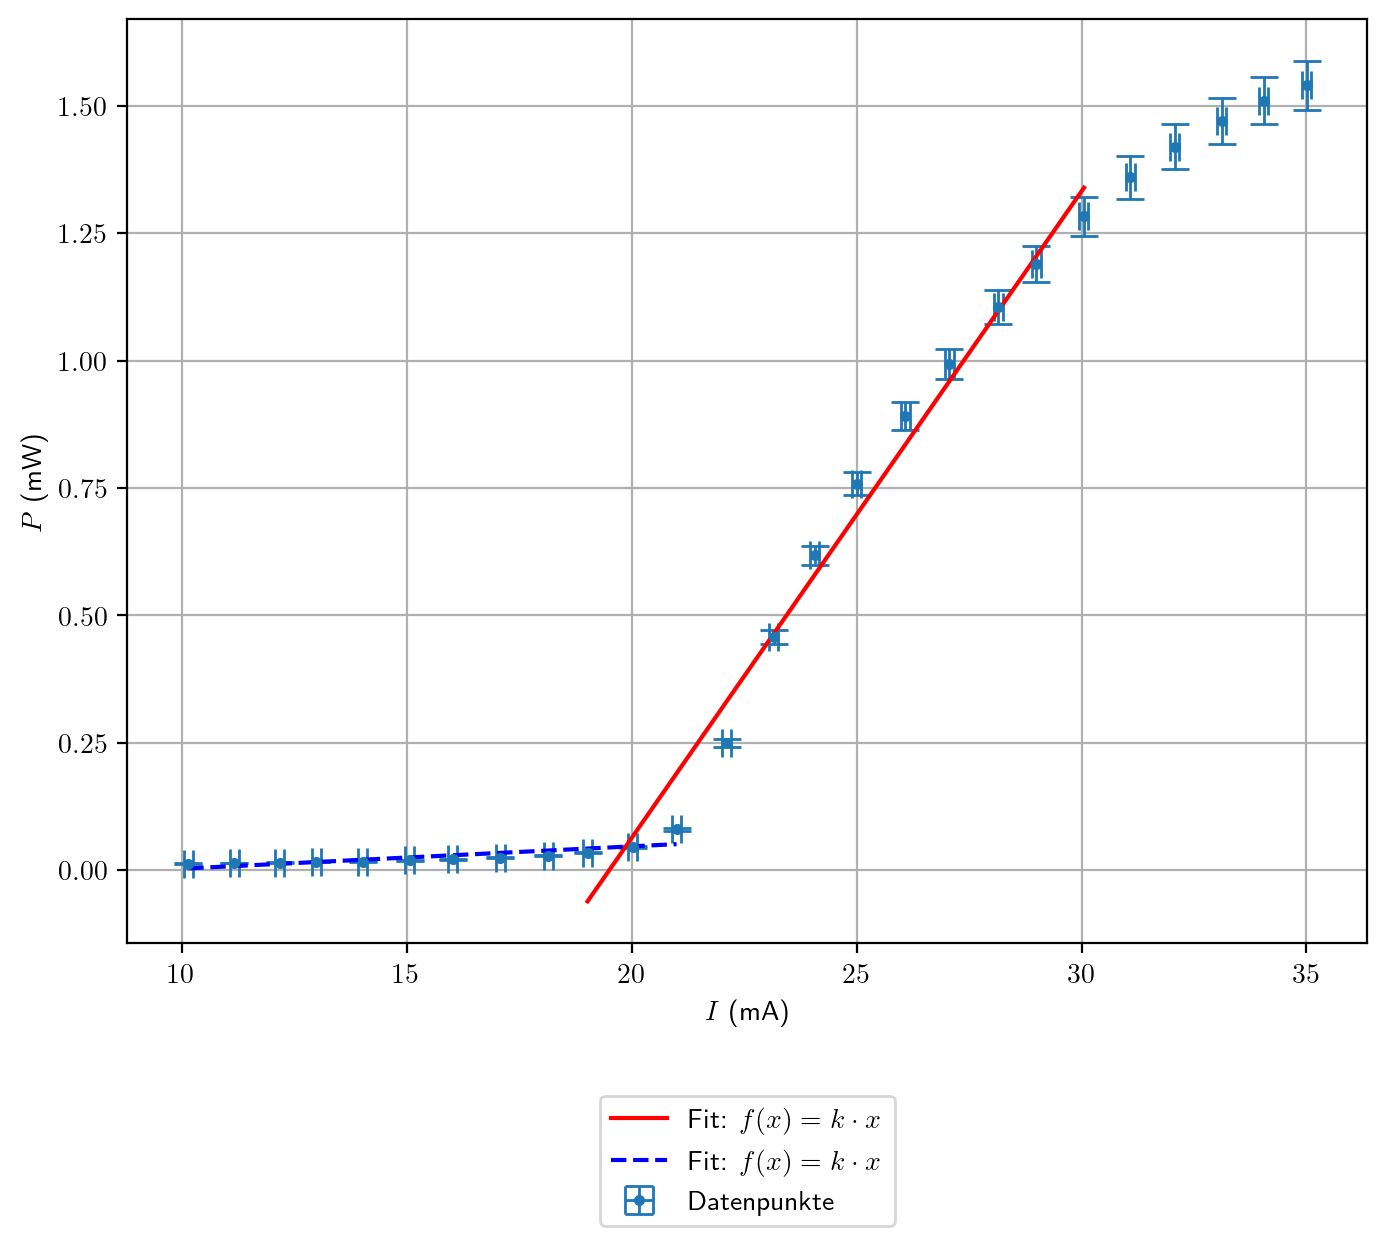

Schnittpunkt mit Fehler: (x, y) = (19.860 ± 1.091, 0.046 ± 0.170)
Schnittpunkt: (x, y) = (19.860, 0.046)
0.12686314273767105
0.005347149937547933
0.004381921867541168
0.0009740354066075734


In [399]:
#definition der fit funktion
def fit_1(k, x, d):
    return k * x + d

def fit_2(k, x, d):
    return k * x + d

I_S_20 = 20.0
I_f_20 = 31.0
mask_1 = (I_20 >= I_S_20 - 1) & (I_f_20 > I_20) # Maske für I-Werte über dem Schwellstrom
I_fit_20_1 = I_20[mask_1]  # Gefilterte x-Werte
P_fit_20_1 = P_20[mask_1]  # Gefilterte y-Werte
I_error_fit_20_1 = I_error_1_20[mask_1]  # Gefilterte Fehler für I
P_error_fit_20_1 = P_error_20[mask_1]

mask_2 = (I_20 <= I_S_20 + 1)
I_fit_20_2 = I_20[mask_2]
P_fit_20_2 = P_20[mask_2]
I_error_fit_20_2 = I_error_1_20[mask_2]  # Gefilterte Fehler für I
P_error_fit_20_2 = P_error_20[mask_2]


params_20_1, covariance_20_1 = curve_fit(fit_1, I_fit_20_1, P_fit_20_1)
params_20_2, covariance_20_2 = curve_fit(fit_2, I_fit_20_2, P_fit_20_2)
 

k_fit_1 = params_20_1[0]  # Angepasste Parameter
errors_1 = np.sqrt(np.diag(covariance_20_1))  # Fehler der Parameter
k_err_1 = errors_1[0] 

k_fit_2 = params_20_2[0]
errors_2 = np.sqrt(np.diag(covariance_20_2))
k_err_2 = errors_2[0]

plt.figure(figsize=(8, 6), dpi=200)
plt.errorbar(I_20, P_20, xerr=I_error_1_20, yerr=P_error_20, fmt='o', markersize=3, label='Datenpunkte', capsize=5, capthick=1, elinewidth=1)
plt.plot(I_fit_20_1, fit_1(I_fit_20_1, *params_20_1), label=r'Fit: $f(x)=k \cdot x$', color='red')
plt.plot(I_fit_20_2, fit_2(I_fit_20_2, *params_20_2), linestyle='--', label=r'Fit: $f(x)=k \cdot x$', color='blue')
plt.xlabel('$I$ (mA)')
plt.ylabel('$P$ (mW)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fontsize=10, frameon=True)
plt.grid(True)
plt.show()

# Schnittpunkt berechnen
x_intersect = (params_20_2[1] - params_20_1[1]) / (params_20_1[0] - params_20_2[0])
y_intersect = fit_1(x_intersect, *params_20_1)

# Fehler der Fit-Parameter extrahieren
d_err_1 = errors_1[1]
d_err_2 = errors_2[1]

# Berechnung des Fehlers von x_intersect mit Fehlerfortpflanzung
denominator = (k_fit_1 - k_fit_2)
numerator = (k_fit_2 - k_fit_1)

x_intersect_err = np.sqrt(
    (1 / denominator) ** 2 * (d_err_1 ** 2 + d_err_2 ** 2) +
    (numerator / denominator ** 2) ** 2 * (k_err_1 ** 2 + k_err_2 ** 2)
)

# Berechnung des Fehlers von y_intersect mit Fehlerfortpflanzung
y_intersect_err = np.sqrt(
    (x_intersect ** 2) * k_err_1 ** 2 + d_err_1 ** 2
)

print(f"Schnittpunkt mit Fehler: (x, y) = ({x_intersect:.3f} ± {x_intersect_err:.3f}, {y_intersect:.3f} ± {y_intersect_err:.3f})")



print(f"Schnittpunkt: (x, y) = ({x_intersect:.3f}, {y_intersect:.3f})")
print(k_fit_1)
print(k_err_1)
print(k_fit_2)
print(k_err_2)


Daten für 25 Grad

In [400]:
I_raw_25 = np.array([10.13, 11.12, 12.03, 13.22, 14.06, 15.09, 16.06, 17.14, 18.10, 19.08, 20.07, 21.03, 22.01,
              23.04, 24.05, 25.07, 26.04, 27.15, 28.07, 29.01, 30.09, 31.01, 32.15, 33.17, 34.08, 35.10])
I_error_1_25 = np.full(26, 0.01)
#I_error_2 = ffffffff
#I_error
I_25 = I_raw_25 - 0.00572

P_25 = np.array([0.01204, 0.0131 , 0.0142 , 0.0157 , 0.017  , 0.0185 , 0.0207 ,
       0.0235 , 0.0267 , 0.0313 , 0.0388 , 0.0544 , 0.1178 , 0.302  ,
       0.496  , 0.669  , 0.806  , 0.937  , 1.032  , 1.122  , 1.223  ,
       1.3    , 1.38   , 1.44   , 1.49   , 1.53   ])
P_error_1_25 = np.array([0.00005, 0.00010, 0.00010, 0.00010, 0.00010, 0.00010, 0.00010, 0.00010, 0.00010, 
                    0.00010, 0.00010, 0.00010, 0.0001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 
                    0.001, 0.001, 0.01, 0.01, 0.01, 0.01])
P_error_2_25 = P_25 * 0.03

P_error_25 = np.sqrt(P_error_1_25**2 + P_error_2_25**2)


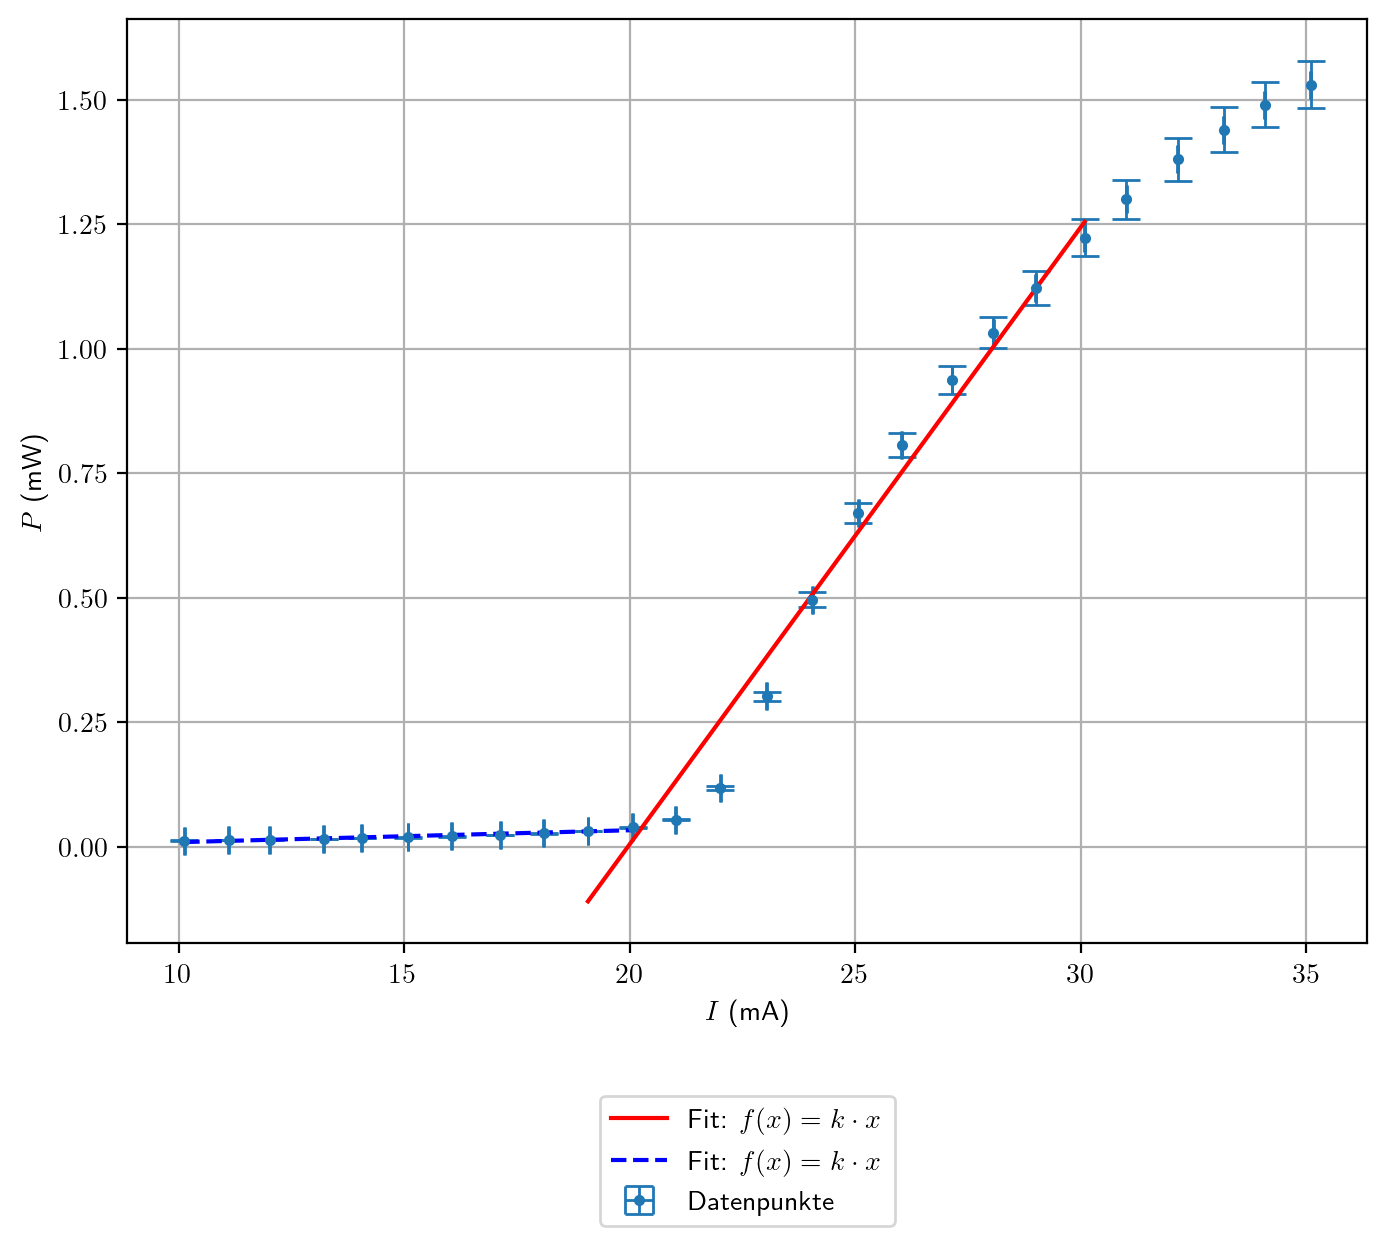

Schnittpunkt mit Fehler: (x, y) = (20.231 ± 1.314, 0.033 ± 0.206)
Schnittpunkt: (x, y) = (20.231, 0.033)
0.12393117817127733
0.006431690979123644
0.0024025079044306405
0.0002681244759585102


In [401]:
#definition der fit funktion
def fit_1(k, x, d):
    return k * x + d

def fit_2(k, x, d):
    return k * x + d

I_S_25 = 20.0
I_f_25 = 31.0
mask_1 = (I_25 >= I_S_25 - 1) & (I_f_25 > I_25) # Maske für I-Werte über dem Schwellstrom
I_fit_25_1 = I_25[mask_1]  # Gefilterte x-Werte
P_fit_25_1 = P_25[mask_1]  # Gefilterte y-Werte
I_error_fit_25_1 = I_error_1_25[mask_1]  # Gefilterte Fehler für I
P_error_fit_25_1 = P_error_25[mask_1]

mask_2 = (I_25 <= I_S_25 + 1)
I_fit_25_2 = I_25[mask_2]
P_fit_25_2 = P_25[mask_2]
I_error_fit_25_2 = I_error_1_25[mask_2]  # Gefilterte Fehler für I
P_error_fit_25_2 = P_error_25[mask_2]


params_25_1, covariance_25_1 = curve_fit(fit_1, I_fit_25_1, P_fit_25_1)
params_25_2, covariance_25_2 = curve_fit(fit_2, I_fit_25_2, P_fit_25_2)
 

k_fit_1 = params_25_1[0]  # Angepasste Parameter
errors_1 = np.sqrt(np.diag(covariance_25_1))  # Fehler der Parameter
k_err_1 = errors_1[0] 

k_fit_2 = params_25_2[0]
errors_2 = np.sqrt(np.diag(covariance_25_2))
k_err_2 = errors_2[0]

plt.figure(figsize=(8, 6), dpi=200)
plt.errorbar(I_25, P_25, xerr=I_error_1_25, yerr=P_error_25, fmt='o', markersize=3, label='Datenpunkte', capsize=5, capthick=1, elinewidth=1)
plt.plot(I_fit_25_1, fit_1(I_fit_25_1, *params_25_1), label=r'Fit: $f(x)=k \cdot x$', color='red')
plt.plot(I_fit_25_2, fit_2(I_fit_25_2, *params_25_2), linestyle='--', label=r'Fit: $f(x)=k \cdot x$', color='blue')
plt.xlabel('$I$ (mA)')
plt.ylabel('$P$ (mW)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fontsize=10, frameon=True)
plt.grid(True)
plt.show()

# Schnittpunkt berechnen
x_intersect = (params_25_2[1] - params_25_1[1]) / (params_25_1[0] - params_25_2[0])
y_intersect = fit_1(x_intersect, *params_25_1)

d_err_1 = errors_1[1]
d_err_2 = errors_2[1]

# Berechnung des Fehlers von x_intersect mit Fehlerfortpflanzung
denominator = (k_fit_1 - k_fit_2)
numerator = (k_fit_2 - k_fit_1)

x_intersect_err = np.sqrt(
    (1 / denominator) ** 2 * (d_err_1 ** 2 + d_err_2 ** 2) +
    (numerator / denominator ** 2) ** 2 * (k_err_1 ** 2 + k_err_2 ** 2)
)

# Berechnung des Fehlers von y_intersect mit Fehlerfortpflanzung
y_intersect_err = np.sqrt(
    (x_intersect ** 2) * k_err_1 ** 2 + d_err_1 ** 2
)

print(f"Schnittpunkt mit Fehler: (x, y) = ({x_intersect:.3f} ± {x_intersect_err:.3f}, {y_intersect:.3f} ± {y_intersect_err:.3f})")


print(f"Schnittpunkt: (x, y) = ({x_intersect:.3f}, {y_intersect:.3f})")

print(k_fit_1)
print(k_err_1)
print(k_fit_2)
print(k_err_2)



Daten für eine Temperatur von 30 Grad

In [402]:
I_raw_30 = np.array([10.02, 11.10, 12.05, 13.17, 14.15, 15.11, 16.03, 17.07, 18.13, 19.15, 20.10, 21.13, 22.03,
              23.04, 24.10, 25.04, 26.06, 27.08, 28.00, 29.04, 30.09, 31.07, 32.01, 33.10, 34.11, 35.09])
I_error_1_30 = np.full(26, 0.01)
#I_error_2 = ffffffff
#I_error
I_30 = I_raw_30 - 0.00572

P_30 = np.array([0.01181, 0.01292, 0.0140, 0.0155, 0.0169, 0.0184, 0.0201, 0.0224, 0.0253, 0.0291, 
       0.0343, 0.0439, 0.0635, 0.154, 0.350, 0.525, 0.688, 0.825, 0.929, 1.030, 
       1.120, 1.206, 1.282, 1.36, 1.42, 1.47])
P_error_1_30 = np.array([0.00005, 0.00005, 0.00010, 0.00010, 0.00010, 0.00010, 0.00010, 0.00010, 0.00010, 
                    0.00010, 0.00010, 0.00010, 0.0001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 
                    0.001, 0.001, 0.001, 0.01, 0.01, 0.01])
P_error_2_30 = P_30 * 0.03

P_error_30 = np.sqrt(P_error_1_30**2 + P_error_2_30**2)


Plot für Temperatur von 30 Grad

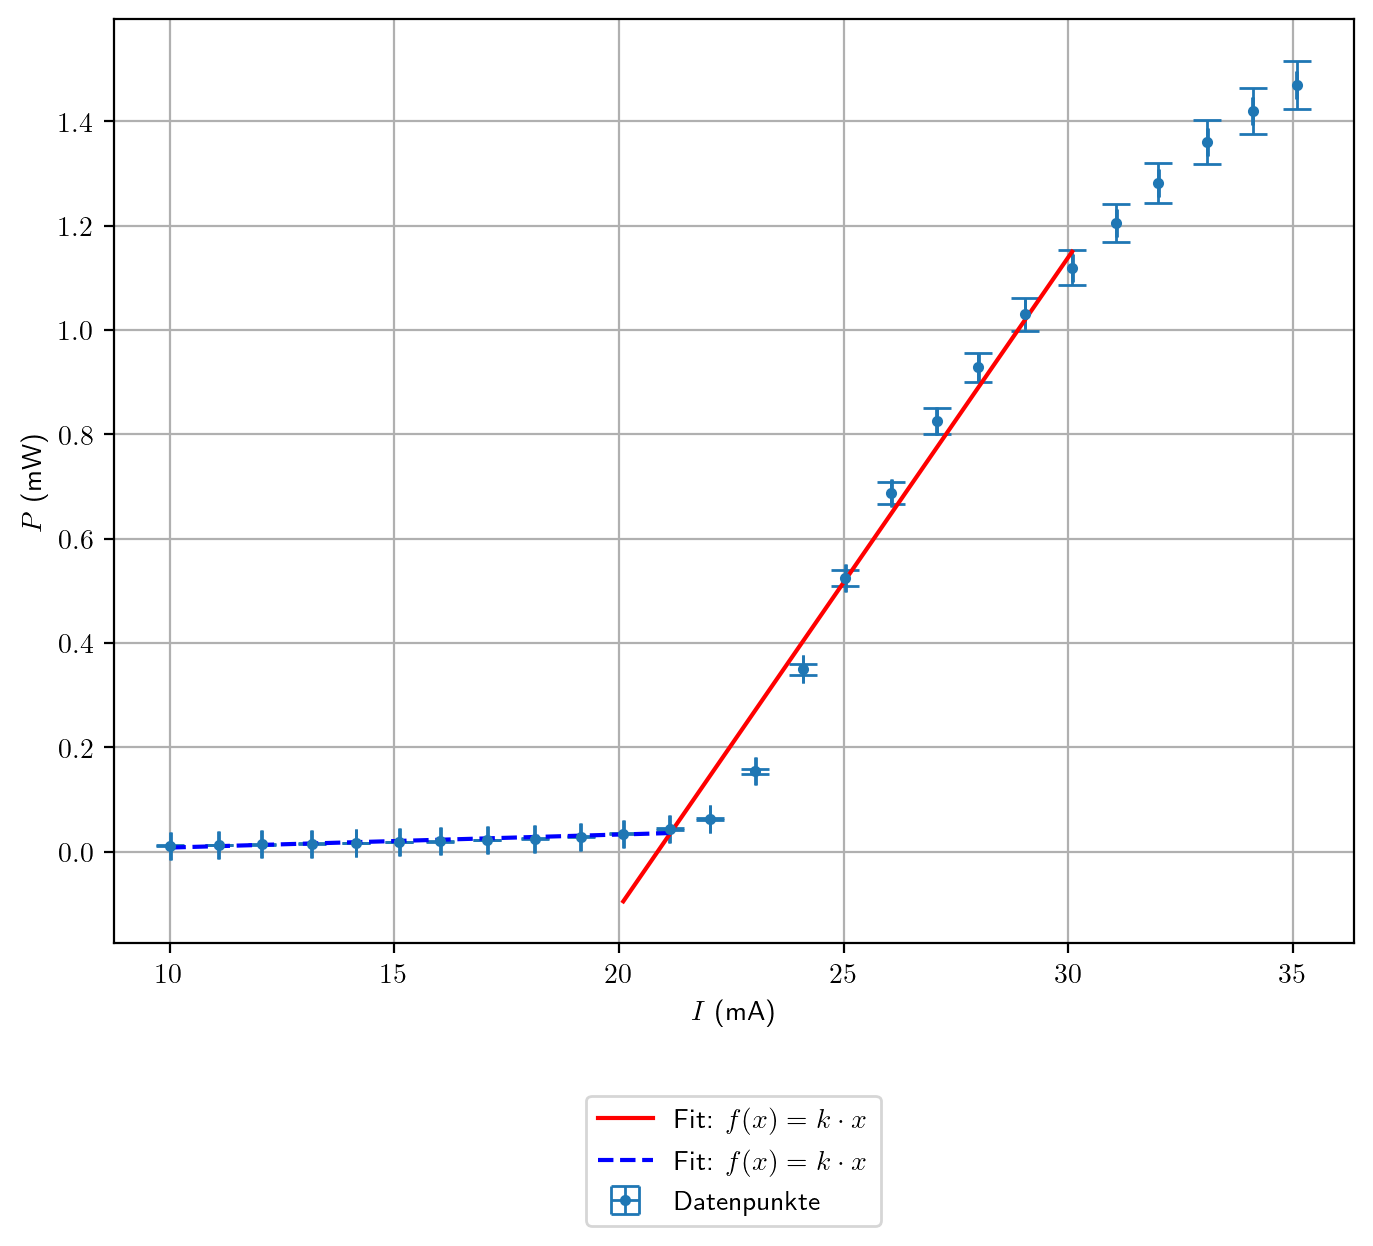

Schnittpunkt mit Fehler: (x, y) = (21.145 ± 1.431, 0.036 ± 0.228)
Schnittpunkt: (x, y) = (21.145, 0.036)
0.12466145808812398
0.006913311555139081
0.0024987151419875266
0.0002951002454057635


In [403]:
#definition der fit funktion
def fit_1(k, x, d):
    return k * x + d

def fit_2(k, x, d):
    return k * x + d

I_S_30 = 20.0
I_f_30 = 31.0
mask_1 = (I_30 >= I_S_30) & (I_f_30 > I_30) # Maske für I-Werte über dem Schwellstrom
I_fit_30_1 = I_30[mask_1]  # Gefilterte x-Werte
P_fit_30_1 = P_30[mask_1]  # Gefilterte y-Werte
I_error_fit_30_1 = I_error_1_30[mask_1]  # Gefilterte Fehler für I
P_error_fit_30_1 = P_error_30[mask_1]

mask_2 = (I_30 <= I_S_30 + 2)
I_fit_30_2 = I_30[mask_2]
P_fit_30_2 = P_30[mask_2]
I_error_fit_30_2 = I_error_1_30[mask_2]  # Gefilterte Fehler für I
P_error_fit_30_2 = P_error_30[mask_2]


params_30_1, covariance_30_1 = curve_fit(fit_1, I_fit_30_1, P_fit_30_1)
params_30_2, covariance_30_2 = curve_fit(fit_2, I_fit_30_2, P_fit_30_2)
 

k_fit_1 = params_30_1[0]  # Angepasste Parameter
errors_1 = np.sqrt(np.diag(covariance_30_1))  # Fehler der Parameter
k_err_1 = errors_1[0] 

k_fit_2 = params_30_2[0]
errors_2 = np.sqrt(np.diag(covariance_30_2))
k_err_2 = errors_2[0]

plt.figure(figsize=(8, 6), dpi=200)
plt.errorbar(I_30, P_30, xerr=I_error_1_30, yerr=P_error_30, fmt='o', markersize=3, label='Datenpunkte', capsize=5, capthick=1, elinewidth=1)
plt.plot(I_fit_30_1, fit_1(I_fit_30_1, *params_30_1), label=r'Fit: $f(x)=k \cdot x$', color='red')
plt.plot(I_fit_30_2, fit_2(I_fit_30_2, *params_30_2), linestyle='--', label=r'Fit: $f(x)=k \cdot x$', color='blue')
plt.xlabel('$I$ (mA)')
plt.ylabel('$P$ (mW)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fontsize=10, frameon=True)
plt.grid(True)
plt.show()

# Schnittpunkt berechnen
x_intersect = (params_30_2[1] - params_30_1[1]) / (params_30_1[0] - params_30_2[0])
y_intersect = fit_1(x_intersect, *params_30_1)
d_err_1 = errors_1[1]
d_err_2 = errors_2[1]

# Berechnung des Fehlers von x_intersect mit Fehlerfortpflanzung
denominator = (k_fit_1 - k_fit_2)
numerator = (k_fit_2 - k_fit_1)

x_intersect_err = np.sqrt(
    (1 / denominator) ** 2 * (d_err_1 ** 2 + d_err_2 ** 2) +
    (numerator / denominator ** 2) ** 2 * (k_err_1 ** 2 + k_err_2 ** 2)
)

# Berechnung des Fehlers von y_intersect mit Fehlerfortpflanzung
y_intersect_err = np.sqrt(
    (x_intersect ** 2) * k_err_1 ** 2 + d_err_1 ** 2
)

print(f"Schnittpunkt mit Fehler: (x, y) = ({x_intersect:.3f} ± {x_intersect_err:.3f}, {y_intersect:.3f} ± {y_intersect_err:.3f})")


print(f"Schnittpunkt: (x, y) = ({x_intersect:.3f}, {y_intersect:.3f})")


print(k_fit_1)
print(k_err_1)
print(k_fit_2)
print(k_err_2)

Plot für alle Temperaturen

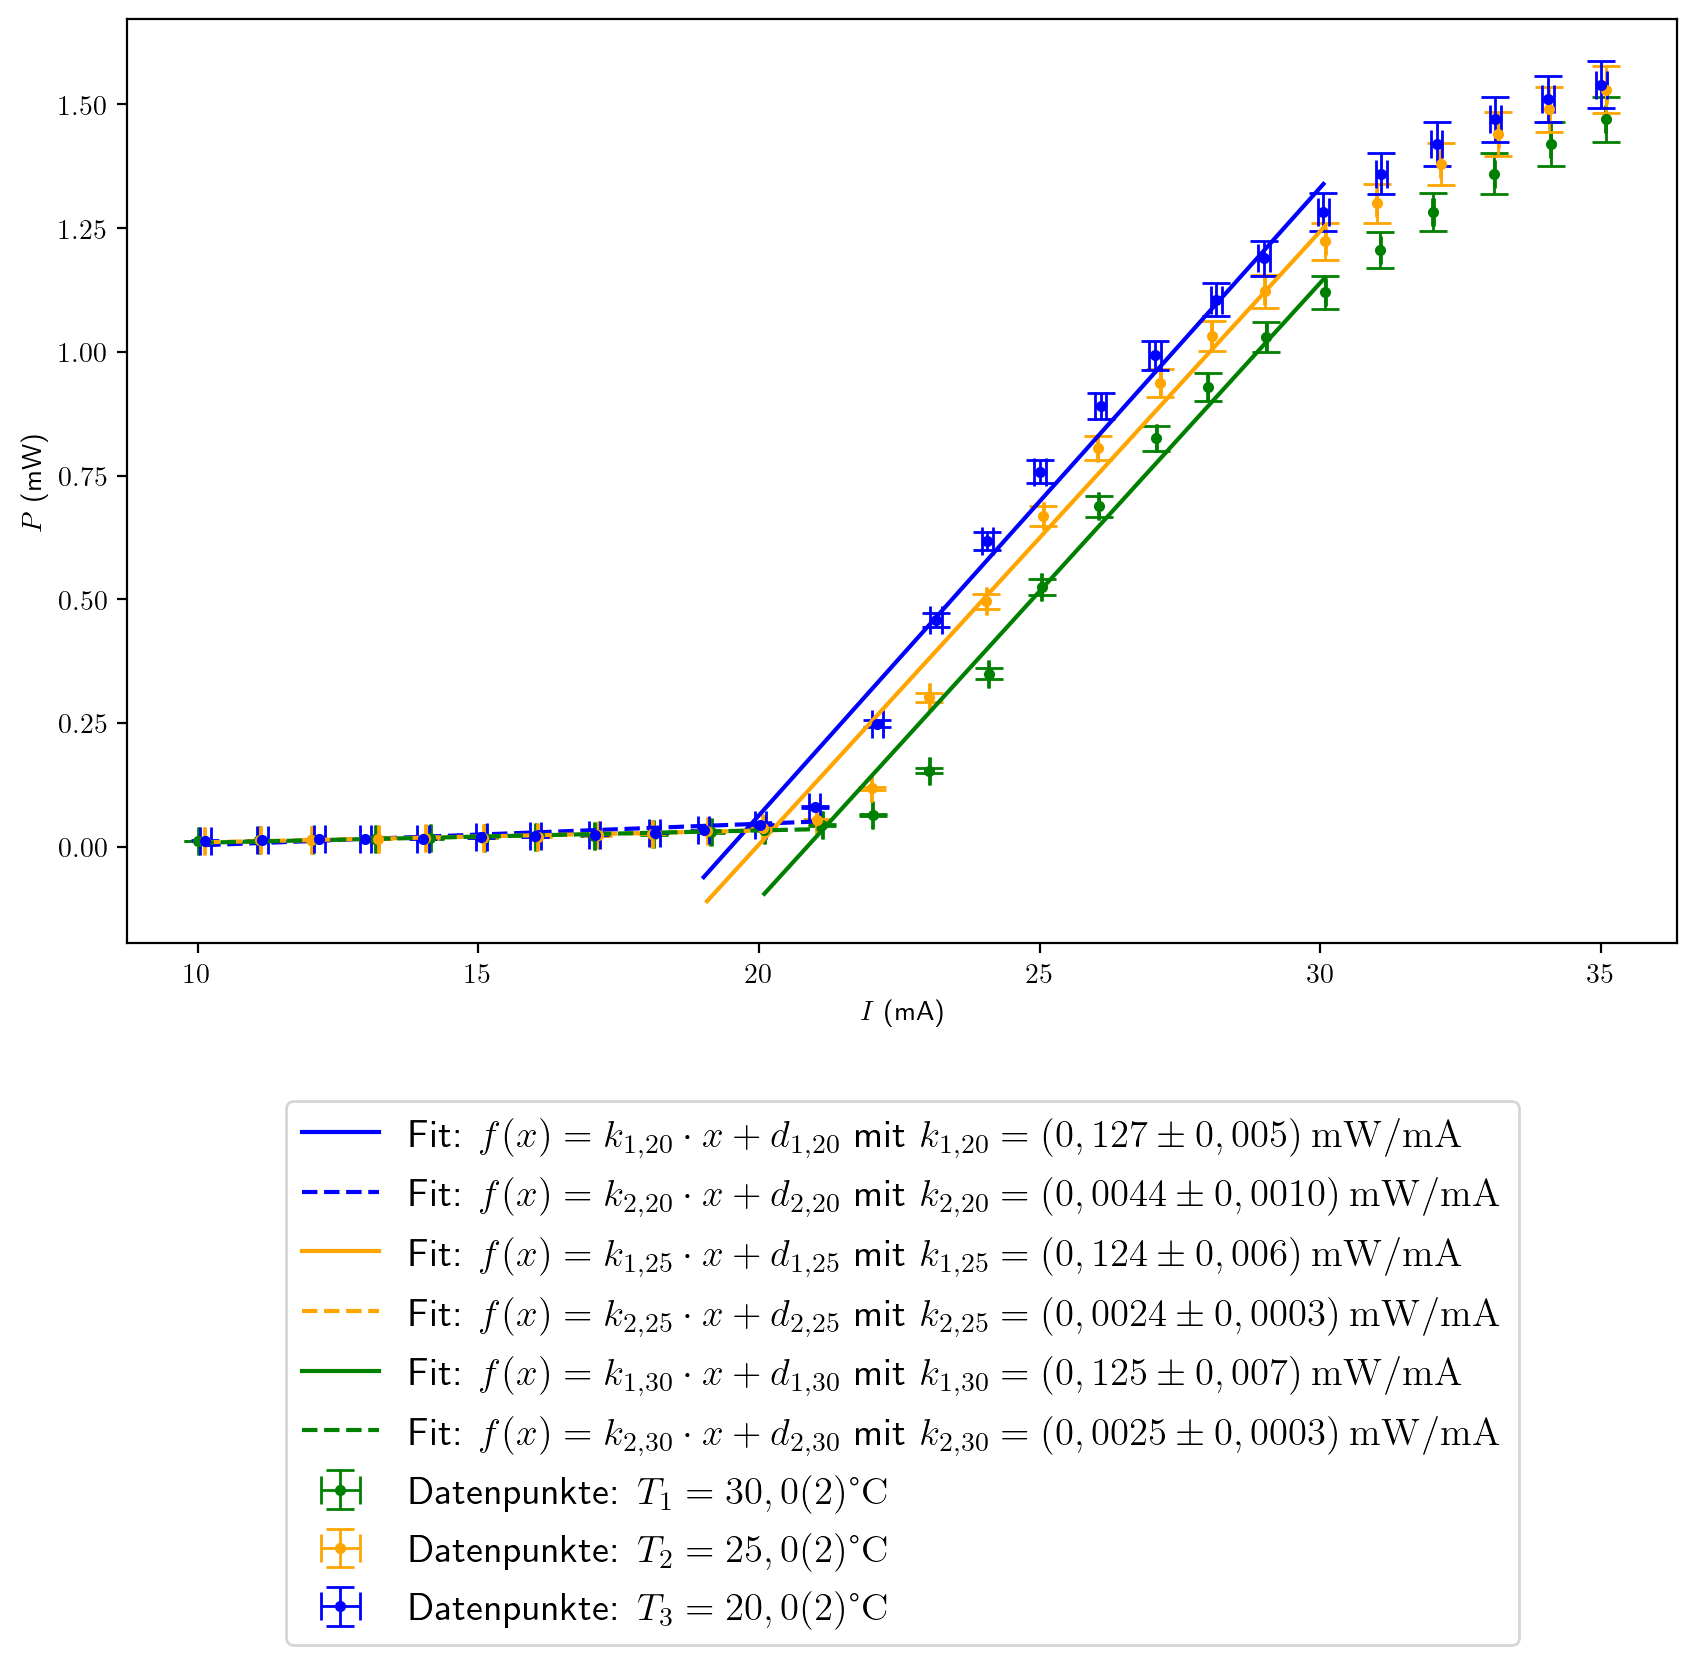

In [404]:
plt.figure(figsize=(10, 6), dpi=200)
plt.errorbar(I_30, P_30, xerr=I_error_1_30, yerr=P_error_30, fmt='o', markersize=3, label=r'Datenpunkte: $T_1 = 30,0(2)$°$\mathrm{C}$', capsize=5, capthick=1, elinewidth=1, color='green')
plt.errorbar(I_25, P_25, xerr=I_error_1_25, yerr=P_error_25, fmt='o', markersize=3, label=r'Datenpunkte: $T_2 = 25,0(2)$°$\mathrm{C}$', capsize=5, capthick=1, elinewidth=1, color='orange')
plt.errorbar(I_20, P_20, xerr=I_error_1_20, yerr=P_error_20, fmt='o', markersize=3, label=r'Datenpunkte: $T_3 = 20,0(2)$°$\mathrm{C}$', capsize=5, capthick=1, elinewidth=1, color='blue')

plt.plot(I_fit_20_1, fit_1(I_fit_20_1, *params_20_1), label=r'Fit: $f(x)=k_{1,20} \cdot x + d_{1,20}$ mit $k_{1,20} = (0,127 \pm 0,005) \: \mathrm{mW/mA}$', color='blue')
plt.plot(I_fit_20_2, fit_2(I_fit_20_2, *params_20_2), linestyle='--', label=r'Fit: $f(x)=k_{2,20} \cdot x + d_{2,20}$ mit $k_{2,20} = (0,0044 \pm 0,0010)\: \mathrm{ mW/mA}$', color='blue')
plt.plot(I_fit_25_1, fit_1(I_fit_25_1, *params_25_1), label=r'Fit: $f(x)=k_{1,25} \cdot x + d_{1,25}$ mit $k_{1,25} = (0,124 \pm 0,006)\: \mathrm{ mW/mA}$', color='orange')
plt.plot(I_fit_25_2, fit_2(I_fit_25_2, *params_25_2), linestyle='--', label=r'Fit: $f(x)=k_{2,25} \cdot x + d_{2,25}$ mit $k_{2,25} = (0,0024 \pm 0,0003)\: \mathrm{ mW/mA}$', color='orange')
plt.plot(I_fit_30_1, fit_1(I_fit_30_1, *params_30_1), label=r'Fit: $f(x)=k_{1,30} \cdot x + d_{1,30}$ mit $k_{1,30} = (0,125 \pm 0,007)\: \mathrm{ mW/mA}$', color='green')
plt.plot(I_fit_30_2, fit_2(I_fit_30_2, *params_30_2), linestyle='--', label=r'Fit: $f(x)=k_{2,30} \cdot x + d_{2,30}$ mit $k_{2,30} = (0,0025 \pm 0,0003)\: \mathrm{ mW/mA}$', color='green')
                                                            
"""
plt.plot(I_fit_30_1, fit(I_fit_30, *params_30), label=r'Fit: $f(x)=k_{1,20} \cdot x$ mit $k_{1,20} = $', color='green')
plt.plot(I_fit_25, fit(I_fit_25, *params_25), label=r'Fit: $f(x)=k \cdot x$', color='orange')
plt.plot(I_fit_20, fit(I_fit_20, *params_20), label=r'Fit: $f(x)=k \cdot x$', color='blue')
"""
plt.xlabel('$I$ (mA)')
plt.ylabel('$P$ (mW)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fontsize=14, frameon=True)
plt.grid(False)
plt.show()

### Nachdem nun mthilfe von k, also der Steigung, die Effizienz $\eta$ bestimmt werden konnte, wird nun daraus die Quanteneffizienz $\eta_d = \eta \frac{e \lambda}{h c}$ bestimmt

In [405]:
wavelength = 630 * nano

eta_20 = params_20_1[0]
eta_25 = params_25_1[0]
eta_30 = params_30_1[0]

error_eta_20 = np.sqrt(np.diag(covariance_20_1))
error_eta_25 = np.sqrt(np.diag(covariance_25_1))
error_eta_30 = np.sqrt(np.diag(covariance_30_1)) 

eta_d_20 = eta_20 * e * wavelength / (h * c)
eta_d_25 = eta_25 * e * wavelength / (h * c)
eta_d_30 = eta_30 * e * wavelength / (h * c)

error_eta_d_20 = error_eta_20 * e * wavelength / (h * c)
error_eta_d_25 = error_eta_25 * e * wavelength / (h * c)
error_eta_d_30 = error_eta_30 * e * wavelength / (h * c)

print(eta_d_20) 
print(error_eta_d_20)

print(eta_d_25)
print(error_eta_d_25)

print(eta_d_30)
print(error_eta_d_30)

0.0644628758621961
[0.00271704 0.06738345]
0.06297305885311712
[0.00326813 0.08103628]
0.06334413545273822
[0.00351286 0.08872048]


## 2. Teil: Auswertung der Oszilloskop-Datem

In diesem Teil der Auswertung wird nun die Frequenzcharakteristik untersucht. Dafür wird das Emissionsspektrum in Abhängigkeit von Strom und Temperatur mithilfe des Fabry-Perot-Interferometer (FPI) untersucht. Es müssen der Modenabstand des Lasers und die Ermittlung der Verstimmbarkeit ermittelt werden. 

Daten einlesen für T = 20 Grad

In [406]:
data_20_20 = np.loadtxt('/Users/zarahaigner/Documents/Physik_6 Semester/Fortgeschrittenes Praktikum/Diodenlaser/data/T20_I20.CSV', delimiter=",", skiprows=1)
t_20_20 = data_20_20[:, 0]
U_20_20 = data_20_20[:, 1]

data_20_25 = np.loadtxt('/Users/zarahaigner/Documents/Physik_6 Semester/Fortgeschrittenes Praktikum/Diodenlaser/data/T20_I25.CSV', delimiter=",", skiprows=1)
t_20_25 = data_20_25[:, 0]
U_20_25 = data_20_25[:, 1]

data_20_30 = np.loadtxt('/Users/zarahaigner/Documents/Physik_6 Semester/Fortgeschrittenes Praktikum/Diodenlaser/data/T20_I30.CSV', delimiter=",", skiprows=1)
t_20_30 = data_20_30[:, 0]
U_20_30 = data_20_30[:, 1]

data_20_35 = np.loadtxt('/Users/zarahaigner/Documents/Physik_6 Semester/Fortgeschrittenes Praktikum/Diodenlaser/data/T20_I35.CSV', delimiter=",", skiprows=1)
t_20_35 = data_20_35[:, 0]
U_20_35 = data_20_35[:, 1]

definition des gauß fits

Mittelwerte der Peaks: [-0.04253571428571429, -0.021691556390977446, 0.004347082782608696]
Abstände zwischen den Mittelwerten: [0.02084416 0.02603864]


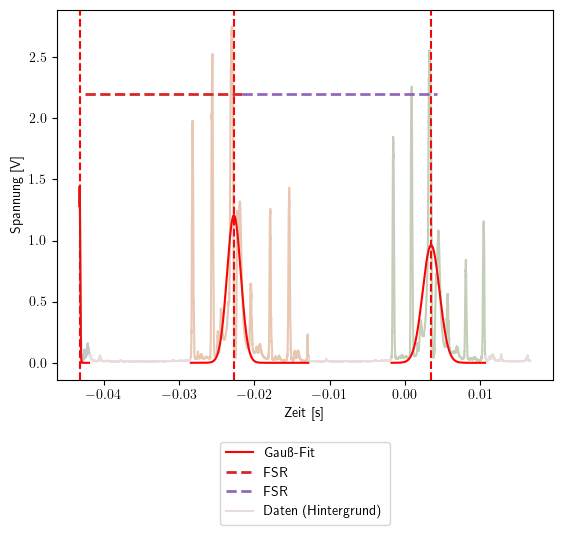

Mittelwerte der Peaks: [-0.04253571428571429, -0.021691556390977446, 0.004347082782608696]
Abstände zwischen den Mittelwerten: [0.02084416 0.02603864]


In [407]:
# Gauß-Funktion für den Fit
def gauss(x, amp, cen, wid):
    return amp * np.exp(-(x - cen)**2 / (2 * wid**2))

# Peaks finden
peaks, _ = find_peaks(U_20_20, height=0.1, distance=5)

# Funktion, um benachbarte Peaks zu gruppieren
def group_peaks(peaks, t_20_20, max_distance=0.005):
    grouped_peaks = []
    current_group = [peaks[0]]
    
    for i in range(1, len(peaks)):
        if t_20_20[peaks[i]] - t_20_20[current_group[-1]] < max_distance:
            current_group.append(peaks[i])  # Peaks in der Nähe gruppieren
        else:
            grouped_peaks.append(current_group)
            current_group = [peaks[i]]
    grouped_peaks.append(current_group)  # Letzte Gruppe hinzufügen
    return grouped_peaks

# Peaks in Gruppen basierend auf der maximalen Distanz gruppieren
grouped_peaks = group_peaks(peaks, t_20_20)

# Gauß-Kurven fitten für jede Gruppe
for idx, group in enumerate(grouped_peaks):
    # Wenn eine Gruppe mehr als einen Peak enthält, fitten wir eine Gauß-Kurve
    if len(group) > 1:
        # Definiere den Bereich für den Fit
        left = max(0, group[0] - 10)
        right = min(len(U_20_20), group[-1] + 10)
        x_data = t_20_20[left:right]
        y_data = U_20_20[left:right]
        
        # Startwerte für den Fit: Amplitude, Peak-Position (Mittelwert der Gruppe), Breite
        p0 = [max(y_data), np.mean(t_20_20[group]), 0.0001]
        
        # Fit der Gauß-Kurve
        popt, _ = curve_fit(gauss, x_data, y_data, p0=p0)
        
        # Plot der Daten mit reduzierter Transparenz
        plt.plot(x_data, y_data, alpha=0.2)  # Daten mit reduzierter Transparenz
        
        # Füge den Gauß-Fit hinzu, aber nur einmal für alle Gruppen
        if idx == 0:
            plt.plot(x_data, gauss(x_data, *popt), color='r', label='Gauß-Fit')  # Label nur einmal für den ersten Fit
        else:
            plt.plot(x_data, gauss(x_data, *popt), color='r')  # Weitere Fits ohne Label
            
        plt.axvline(popt[1], color="r", linestyle="--")  # Vertikale Linie bei Peak
 #abstände zwischen den peaks
peak_positions = [np.mean(t_20_20[group]) for group in grouped_peaks]
distances = np.diff(peak_positions)
print("Mittelwerte der Peaks:", peak_positions)
print("Abstände zwischen den Mittelwerten:", distances)

for i in range(len(peak_positions) - 1):
    plt.plot([peak_positions[i], peak_positions[i+1]], [max(U_20_20)*0.8, max(U_20_20)*0.8], '--', lw=2, label='FSR')  # Strich zwischen den Peaks


# Plot der Rohdaten (mit reduzierter Transparenz)
plt.plot(t_20_20, U_20_20, alpha=0.2, label="Daten (Hintergrund)")  # Daten in den Hintergrund stellen
plt.xlabel("Zeit [s]")
plt.ylabel("Intensi[V]")
#plt.title("Fabry-Perot-Transmission für 20°C, 20mA")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fontsize=10, frameon=True)
#plt.legend()
plt.show()

# Berechne die Abstände zwischen den Mittelwerten der Peaks
peak_positions = [np.mean(t_20_20[group]) for group in grouped_peaks]
distances = np.diff(peak_positions)
print("Mittelwerte der Peaks:", peak_positions)
print("Abstände zwischen den Mittelwerten:", distances)


Mittelwerte der Peaks: [-0.04253571428571429, -0.021691556390977446, 0.004347082782608696]
Abstände zwischen den Mittelwerten: [0.02084416 0.02603864]


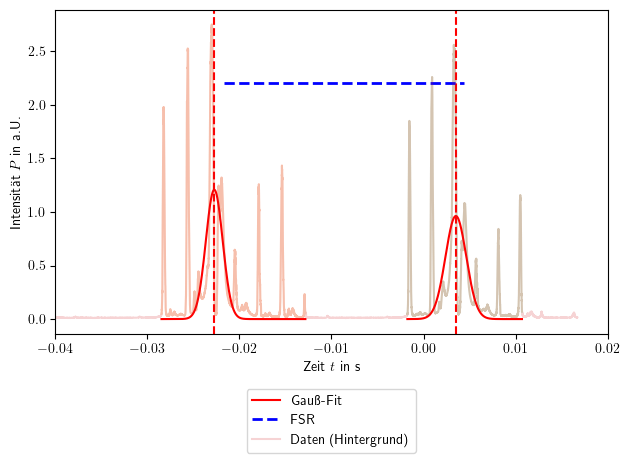

In [469]:
# Gauß-Funktion für den Fit
def gauss(x, amp, cen, wid):
    return amp * np.exp(-(x - cen)**2 / (2 * wid**2))

# Peaks finden
peaks, _ = find_peaks(U_20_20, height=0.1, distance=5)

# Funktion, um benachbarte Peaks zu gruppieren
def group_peaks(peaks, t_20_20, max_distance=0.005):
    grouped_peaks = []
    current_group = [peaks[0]]
    
    for i in range(1, len(peaks)):
        if t_20_20[peaks[i]] - t_20_20[current_group[-1]] < max_distance:
            current_group.append(peaks[i])
        else:
            grouped_peaks.append(current_group)
            current_group = [peaks[i]]
    grouped_peaks.append(current_group)
    return grouped_peaks

# Gruppieren der Peaks
grouped_peaks = group_peaks(peaks, t_20_20)

# Gauß-Fits durchführen
gauss_fit_label_plotted = False  # Nur einmal "Gauß-Fit" in Legende

for idx, group in enumerate(grouped_peaks):
    if len(group) > 1:
        left = max(0, group[0] - 10)
        right = min(len(U_20_20), group[-1] + 10)
        x_data = t_20_20[left:right]
        y_data = U_20_20[left:right]
        
        p0 = [max(y_data), np.mean(t_20_20[group]), 0.0001]
        popt, _ = curve_fit(gauss, x_data, y_data, p0=p0)
        
        plt.plot(x_data, y_data, alpha=0.2)
        
        if idx != 0 and not gauss_fit_label_plotted:
            plt.plot(x_data, gauss(x_data, *popt), color='r', label='Gauß-Fit')
            gauss_fit_label_plotted = True
        else:
            plt.plot(x_data, gauss(x_data, *popt), color='r')
        
        plt.axvline(popt[1], color="r", linestyle="--")

# Mittelwerte und Abstände
peak_positions = [np.mean(t_20_20[group]) for group in grouped_peaks]
distances = np.diff(peak_positions)
print("Mittelwerte der Peaks:", peak_positions)
print("Abstände zwischen den Mittelwerten:", distances)

# FSR-Linie zwischen Peak 1 und 2 (nun zwischen dem zweiten und dritten Peak)
if len(peak_positions) >= 3:
    x2 = peak_positions[1]  # Zweiter Peak
    x3 = peak_positions[2]  # Dritter Peak
    y_level = max(U_20_20) * 0.8
    plt.plot([x2, x3], [y_level, y_level], '--', lw=2, color='blue', label='FSR')

# Plot Rohdaten
plt.xlim(-0.04, 0.02)
plt.plot(t_20_20, U_20_20, alpha=0.2, label="Daten (Hintergrund)")
plt.xlabel("Zeit $t$ in s")
plt.ylabel("Intensität $P$ in a.U.")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fontsize=10, frameon=True)
plt.tight_layout()
plt.show()


## Berechnung des Umrechnungsfaktor

factor = 630 / 0.02603864 * 1000

In [409]:
factor = 630 / 0.02603864 
print(factor)

24194.812017831962


Darstellung in Frequenzdarstellung

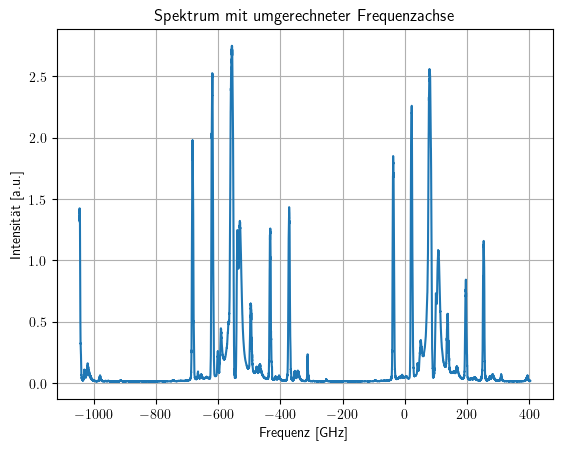

In [410]:
# Umrechnung in GHz
f_20_20_werte = (t_20_20) * factor

# Ausgabe der umgewandelten Werte
#print("Zeitwerte (s):", t_werte)
#print("Frequenzwerte (GHz):", f_werte)

plt.plot(f_20_20_werte, U_20_20)  # U_25_25 = deine Spannungswerte
plt.xlabel("Frequenz [GHz]")
plt.ylabel("Intensität [a.u.]")
plt.title("Spektrum mit umgerechneter Frequenzachse")
plt.grid(True)
plt.show()


Shiften um den Ursprung zu verschieben

In [411]:
%matplotlib inline


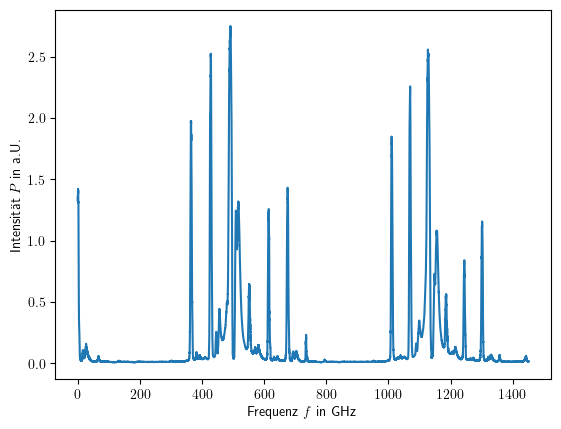

In [466]:
f_20_20_werte_shifted = f_20_20_werte - np.min(f_20_20_werte)

plt.plot(f_20_20_werte_shifted, U_20_20)  
plt.xlabel("Frequenz $f$ in GHz")
plt.ylabel("Intensität $P$ in a.U.")
#plt.title("Spektrum mit umgerechneter Frequenzachse")
plt.grid(False)
plt.show()

Anlegen eines Gaußfits über die Gruppen von Peaks

Mittelwerte der Peaks (GHz): [0.9323571990562828, 497.59101362124153, 1132.4316441002934]
Abstände zwischen den Mittelwerten (GHz): [496.65865642 634.84063048]


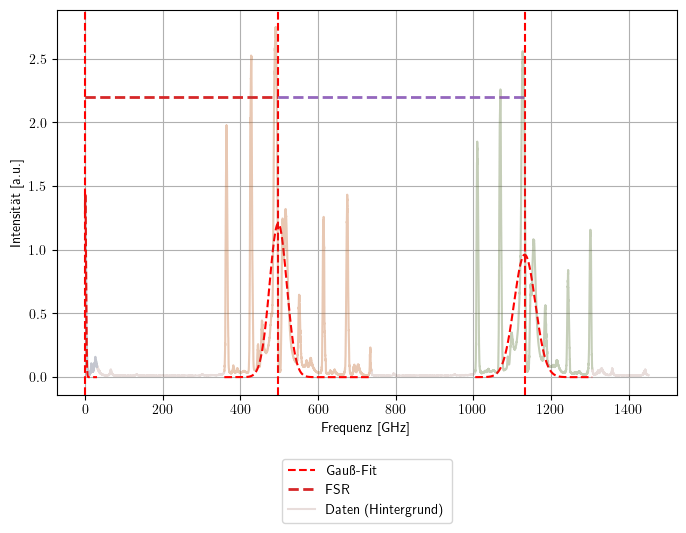

In [413]:
def gauss(x, amp, cen, wid):
    return amp * np.exp(-(x - cen)**2 / (2 * wid**2))

# Peaks finden
peaks, _ = find_peaks(U_20_20, height=0.1, distance=5)

# Funktion, um benachbarte Peaks zu gruppieren
def group_peaks(peaks, f_20_20_werte_shifted, max_distance=100):  # 10 GHz als Schwelle
    grouped_peaks = []
    current_group = [peaks[0]]
    
    for i in range(1, len(peaks)):
        if f_20_20_werte_shifted[peaks[i]] - f_20_20_werte_shifted[current_group[-1]] < max_distance:
            current_group.append(peaks[i])  # Peaks in der Nähe gruppieren
        else:
            grouped_peaks.append(current_group)
            current_group = [peaks[i]]
    grouped_peaks.append(current_group)  # Letzte Gruppe hinzufügen
    return grouped_peaks

# Peaks in Gruppen basierend auf der maximalen Distanz gruppieren
grouped_peaks = group_peaks(peaks, f_20_20_werte_shifted)

# Gauß-Kurven fitten für jede Gruppe
peak_positions = []

plt.figure(figsize=(8, 5))

for idx, group in enumerate(grouped_peaks):
    if len(group) > 1:
        left = max(0, group[0] - 10)
        right = min(len(U_20_20), group[-1] + 10)
        x_data = f_20_20_werte_shifted[left:right]
        y_data = U_20_20[left:right]
        
        p0 = [max(y_data), np.mean(f_20_20_werte_shifted[group]), 5.0]  # Breite in GHz
        
        try:
            popt, _ = curve_fit(gauss, x_data, y_data, p0=p0)
            peak_positions.append(popt[1])  # Mittelpunkt speichern
            
            # Plot der Daten
            plt.plot(x_data, y_data, alpha=0.2)
            plt.plot(x_data, gauss(x_data, *popt), color='r', linestyle="--", label='Gauß-Fit' if idx == 0 else "")
            plt.axvline(popt[1], color="r", linestyle="--")
        
        except RuntimeError:
            print(f"Kein Fit für Gruppe bei {np.mean(x_data):.2f} GHz gefunden")

# Abstände zwischen den Gruppenmittelwerten berechnen
distances = np.diff(peak_positions)
print("Mittelwerte der Peaks (GHz):", peak_positions)
print("Abstände zwischen den Mittelwerten (GHz):", distances)

# Markierung der Abstände zwischen den Gruppenmittelwerten
for i in range(len(peak_positions) - 1):
    plt.plot([peak_positions[i], peak_positions[i+1]], 
             [max(U_20_20)*0.8, max(U_20_20)*0.8], '--', lw=2, label='FSR' if i == 0 else "")

# Plot-Details
plt.plot(f_20_20_werte_shifted, U_20_20, alpha=0.2, label="Daten (Hintergrund)")
plt.xlabel("Frequenz [GHz]")
plt.ylabel("Intensität [a.u.]")
#plt.title("Spektrum mit Gruppierungen und Gauß-Fits")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fontsize=10, frameon=True)
plt.grid(True)
plt.show()

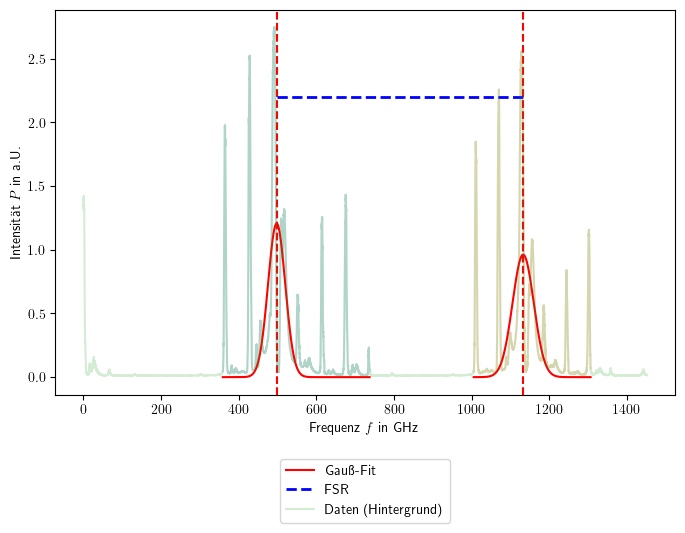

In [467]:
def gauss(x, amp, cen, wid):
    return amp * np.exp(-(x - cen)**2 / (2 * wid**2))

# Peaks finden
peaks, _ = find_peaks(U_20_20, height=0.1, distance=5)

# Funktion, um benachbarte Peaks zu gruppieren
def group_peaks(peaks, f_20_20_werte_shifted, max_distance=100):  # 10 GHz als Schwelle
    grouped_peaks = []
    current_group = [peaks[0]]
    
    for i in range(1, len(peaks)):
        if f_20_20_werte_shifted[peaks[i]] - f_20_20_werte_shifted[current_group[-1]] < max_distance:
            current_group.append(peaks[i])  # Peaks in der Nähe gruppieren
        else:
            grouped_peaks.append(current_group)
            current_group = [peaks[i]]
    grouped_peaks.append(current_group)  # Letzte Gruppe hinzufügen
    return grouped_peaks

# Peaks in Gruppen basierend auf der maximalen Distanz gruppieren
grouped_peaks = group_peaks(peaks, f_20_20_werte_shifted)

# Gauß-Kurven fitten für jede Gruppe
peak_positions = []

plt.figure(figsize=(8, 5))

for idx, group in enumerate(grouped_peaks):
    if len(group) > 1:
        left = max(0, group[0] - 10)
        right = min(len(U_20_20), group[-1] + 10)
        x_data = f_20_20_werte_shifted[left:right]
        y_data = U_20_20[left:right]
        
        p0 = [max(y_data), np.mean(f_20_20_werte_shifted[group]), 5.0]  # Breite in GHz
        
        try:
            popt, _ = curve_fit(gauss, x_data, y_data, p0=p0)
            peak_positions.append(popt[1])  # Mittelpunkt speichern
            
            # Nur für Gruppen ab der zweiten Gruppe die Linien und den Gauß-Fit zeichnen
            if idx > 0:
                # Plot der Daten
                plt.plot(x_data, y_data, alpha=0.2)
                plt.plot(x_data, gauss(x_data, *popt), color='r', linestyle="-", label='Gauß-Fit' if idx == 1 else "")
                plt.axvline(popt[1], color="r", linestyle="--")
                
        except RuntimeError:
            print(f"Kein Fit für Gruppe bei {np.mean(x_data):.2f} GHz gefunden")

# Zeichnen der Linie vom zweiten zum dritten Peak
if len(peak_positions) > 2:
    plt.plot([peak_positions[1], peak_positions[2]], 
             [max(U_20_20)*0.8, max(U_20_20)*0.8], '--', lw=2, color="b", label="FSR")

# Plot-Details
plt.plot(f_20_20_werte_shifted, U_20_20, alpha=0.2, label="Daten (Hintergrund)")
plt.xlabel("Frequenz $f$ in GHz")
plt.ylabel("Intensität $P$ in a.U.")
#plt.title("Spektrum mit Gruppierungen und Gauß-Fits")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fontsize=10, frameon=True)
plt.grid(False)
plt.show()


# Ziel: Finesse bestimmen

### 20, 25

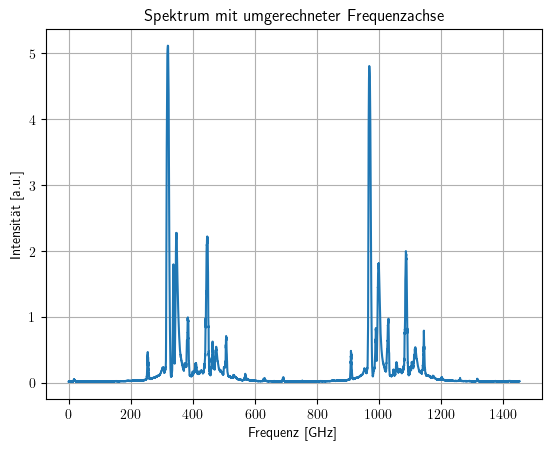

In [415]:
f_20_25_werte = (t_20_25) * factor

f_20_25_werte_shifted = f_20_25_werte - np.min(f_20_25_werte)

plt.plot(f_20_25_werte_shifted, U_20_25)  
plt.xlabel("Frequenz [GHz]")
plt.ylabel("Intensität [a.u.]")
plt.title("Spektrum mit umgerechneter Frequenzachse")
plt.grid(True)
plt.show()

## 20, 30

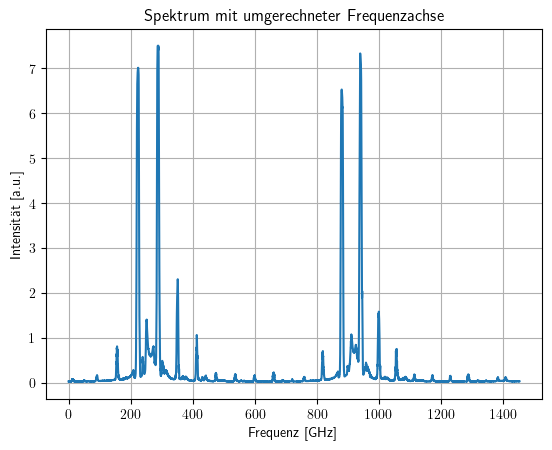

In [416]:
f_20_30_werte = (t_20_30) * factor

f_20_30_werte_shifted = f_20_30_werte - np.min(f_20_30_werte)

plt.plot(f_20_30_werte_shifted, U_20_30)  
plt.xlabel("Frequenz [GHz]")
plt.ylabel("Intensität [a.u.]")
plt.title("Spektrum mit umgerechneter Frequenzachse")
plt.grid(True)
plt.show()

## 20, 35

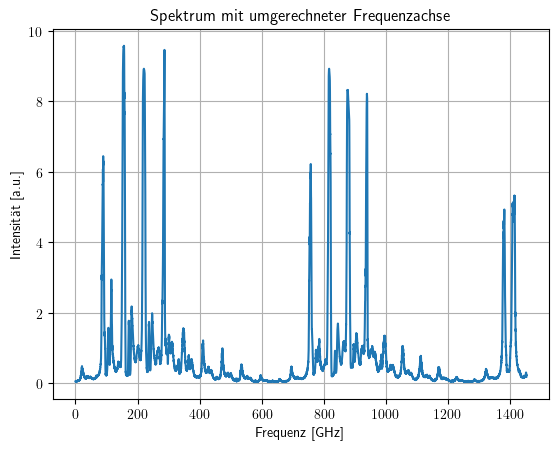

In [417]:
f_20_35_werte = (t_20_35) * factor

f_20_35_werte_shifted = f_20_35_werte - np.min(f_20_35_werte)

plt.plot(f_20_35_werte_shifted, U_20_35)  
plt.xlabel("Frequenz [GHz]")
plt.ylabel("Intensität [a.u.]")
plt.title("Spektrum mit umgerechneter Frequenzachse")
plt.grid(True)
plt.show()

## Daten für T = 25

#### Daten einlesen

In [418]:
data_25_20 = np.loadtxt('/Users/zarahaigner/Documents/Physik_6 Semester/Fortgeschrittenes Praktikum/Diodenlaser/data/T25_I20.CSV', delimiter=",", skiprows=1)
t_25_20 = data_25_20[:, 0]
U_25_20 = data_25_20[:, 1]

data_25_25 = np.loadtxt('/Users/zarahaigner/Documents/Physik_6 Semester/Fortgeschrittenes Praktikum/Diodenlaser/data/T25_I25.CSV', delimiter=",", skiprows=1)
t_25_25 = data_25_25[:, 0]
U_25_25 = data_25_25[:, 1]

data_25_30 = np.loadtxt('/Users/zarahaigner/Documents/Physik_6 Semester/Fortgeschrittenes Praktikum/Diodenlaser/data/T25_I30.CSV', delimiter=",", skiprows=1)
t_25_30 = data_25_30[:, 0]
U_25_30 = data_25_30[:, 1]

data_25_35 = np.loadtxt('/Users/zarahaigner/Documents/Physik_6 Semester/Fortgeschrittenes Praktikum/Diodenlaser/data/T25_I35.CSV', delimiter=",", skiprows=1)
t_25_35 = data_25_35[:, 0]
U_25_35 = data_25_35[:, 1]

#### 25, 20

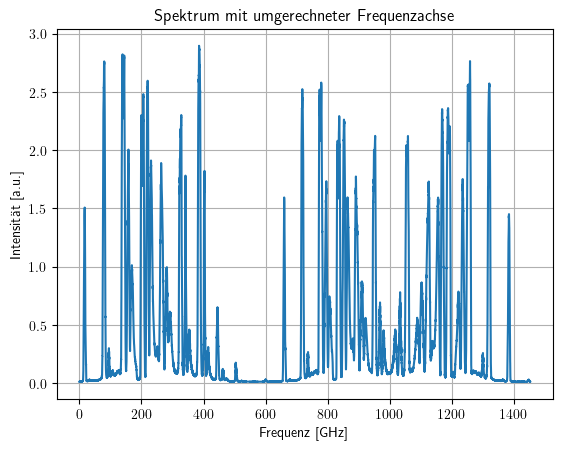

In [419]:
f_25_20_werte = (t_25_20) * factor

f_25_20_werte_shifted = f_25_20_werte - np.min(f_25_20_werte)

plt.plot(f_25_20_werte_shifted, U_25_20)  
plt.xlabel("Frequenz [GHz]")
plt.ylabel("Intensität [a.u.]")
plt.title("Spektrum mit umgerechneter Frequenzachse")
plt.grid(True)
plt.show()

#### 25, 25

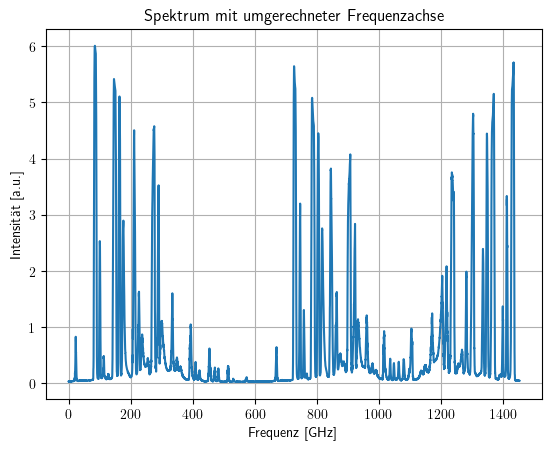

In [420]:
f_25_25_werte = (t_25_25) * factor

f_25_25_werte_shifted = f_25_25_werte - np.min(f_25_25_werte)

plt.plot(f_25_25_werte_shifted, U_25_25)  
plt.xlabel("Frequenz [GHz]")
plt.ylabel("Intensität [a.u.]")
plt.title("Spektrum mit umgerechneter Frequenzachse")
plt.grid(True)
plt.show()

#### 25, 30

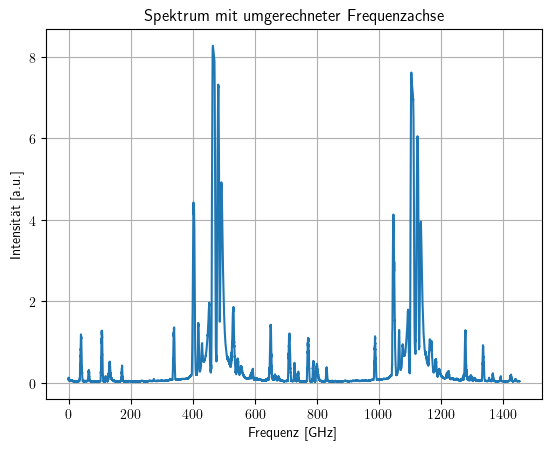

In [421]:
f_25_30_werte = (t_25_30) * factor

f_25_30_werte_shifted = f_25_30_werte - np.min(f_25_30_werte)

plt.plot(f_25_30_werte_shifted, U_25_30)  
plt.xlabel("Frequenz [GHz]")
plt.ylabel("Intensität [a.u.]")
plt.title("Spektrum mit umgerechneter Frequenzachse")
plt.grid(True)
plt.show()

#### 25, 35

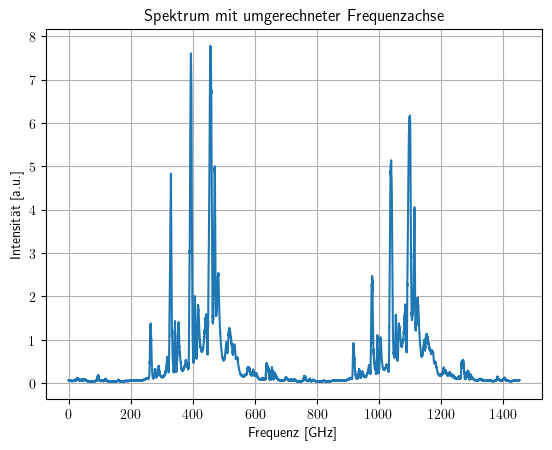

In [422]:
f_25_35_werte = (t_25_35) * factor

f_25_35_werte_shifted = f_25_35_werte - np.min(f_25_35_werte)

plt.plot(f_25_35_werte_shifted, U_25_35)  
plt.xlabel("Frequenz [GHz]")
plt.ylabel("Intensität [a.u.]")
plt.title("Spektrum mit umgerechneter Frequenzachse")
plt.grid(True)
plt.show()

## Daten für T = 30

#### Daten einlesen

In [423]:
data_30_20 = np.loadtxt('/Users/zarahaigner/Documents/Physik_6 Semester/Fortgeschrittenes Praktikum/Diodenlaser/data/T30_I20.CSV', delimiter=",", skiprows=1)
t_30_20 = data_30_20[:, 0]
U_30_20 = data_30_20[:, 1]

data_30_25 = np.loadtxt('/Users/zarahaigner/Documents/Physik_6 Semester/Fortgeschrittenes Praktikum/Diodenlaser/data/T30_I25.CSV', delimiter=",", skiprows=1)
t_30_25 = data_30_25[:, 0]
U_30_25 = data_30_25[:, 1]

data_30_30 = np.loadtxt('/Users/zarahaigner/Documents/Physik_6 Semester/Fortgeschrittenes Praktikum/Diodenlaser/data/T30_I30.CSV', delimiter=",", skiprows=1)
t_30_30 = data_30_30[:, 0]
U_30_30 = data_30_30[:, 1]

data_30_35 = np.loadtxt('/Users/zarahaigner/Documents/Physik_6 Semester/Fortgeschrittenes Praktikum/Diodenlaser/data/T30_I35.CSV', delimiter=",", skiprows=1)
t_30_35 = data_30_35[:, 0]
U_30_35 = data_30_35[:, 1]

#### 30, 20

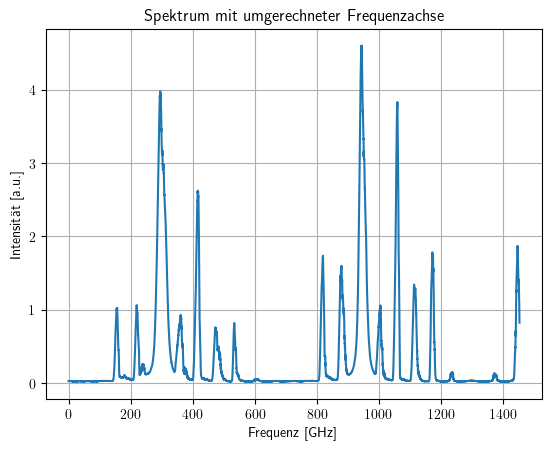

In [424]:
f_30_20_werte = (t_30_20) * factor

f_30_20_werte_shifted = f_30_20_werte - np.min(f_30_20_werte)

plt.plot(f_30_20_werte_shifted, U_30_20)  
plt.xlabel("Frequenz [GHz]")
plt.ylabel("Intensität [a.u.]")
plt.title("Spektrum mit umgerechneter Frequenzachse")
plt.grid(True)
plt.show()

#### 30, 25

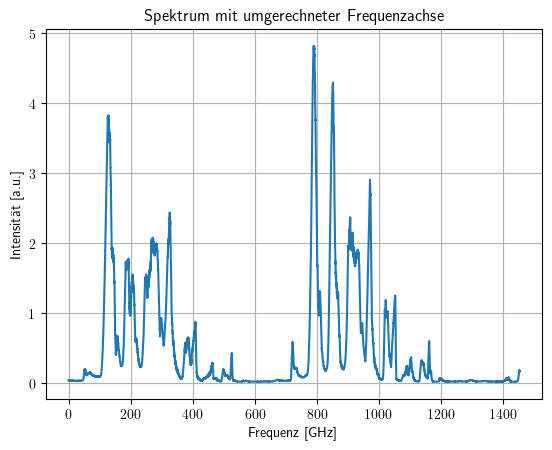

In [425]:
f_30_25_werte = (t_30_25) * factor

f_30_25_werte_shifted = f_30_25_werte - np.min(f_30_25_werte)

plt.plot(f_30_25_werte_shifted, U_30_25)  
plt.xlabel("Frequenz [GHz]")
plt.ylabel("Intensität [a.u.]")
plt.title("Spektrum mit umgerechneter Frequenzachse")
plt.grid(True)
plt.show()

#### 30, 30

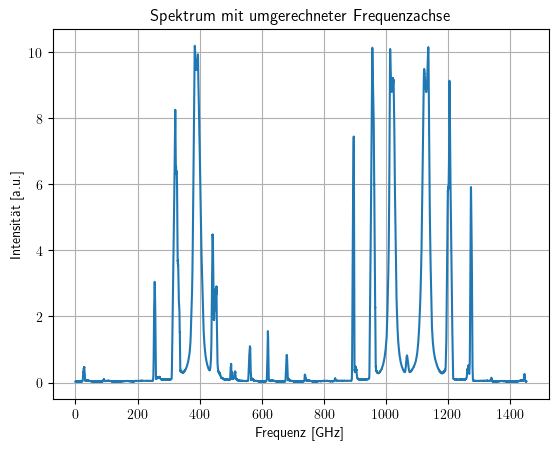

In [426]:
f_30_30_werte = (t_30_30) * factor

f_30_30_werte_shifted = f_30_30_werte - np.min(f_30_30_werte)

plt.plot(f_30_30_werte_shifted, U_30_30)  
plt.xlabel("Frequenz [GHz]")
plt.ylabel("Intensität [a.u.]")
plt.title("Spektrum mit umgerechneter Frequenzachse")
plt.grid(True)
plt.show()

#### 30, 35

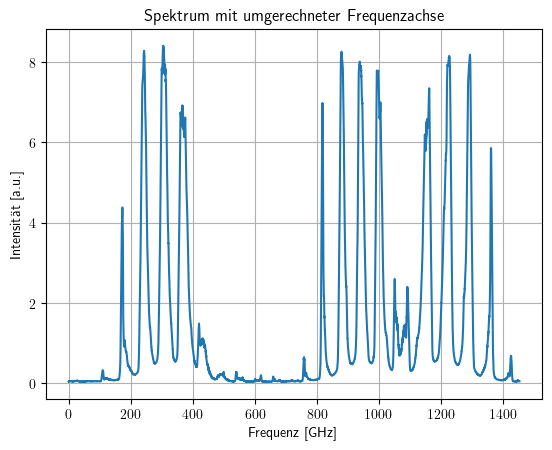

In [427]:
f_30_35_werte = (t_30_35) * factor

f_30_35_werte_shifted = f_30_35_werte - np.min(f_30_35_werte)

plt.plot(f_30_35_werte_shifted, U_30_35)  
plt.xlabel("Frequenz [GHz]")
plt.ylabel("Intensität [a.u.]")
plt.title("Spektrum mit umgerechneter Frequenzachse")
plt.grid(True)
plt.show()

## Nun werden von einer aufnahmen , vom teil eines spektrums die FWHM bestimmt und anschließend die Abstände zwischen den Peaks berechnet dies entspricht der FSR

## Ich verwende die Datei 30, 30

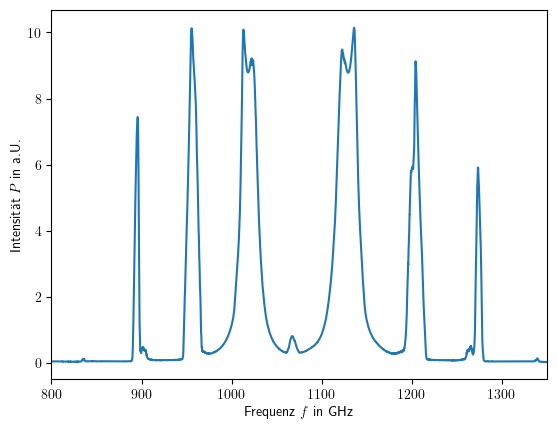

In [468]:
plt.plot(f_30_30_werte_shifted, U_30_30)  
plt.xlabel("Frequenz $f$ in GHz")
plt.ylabel("Intensität $P$ in a.U.")
#plt.title("Zoom auf den Bereich um 1300 GHz")
plt.grid(False)

# Bereich eingrenzen
plt.xlim(800, 1350)

plt.show()


## Berechnung der FWHM

In [429]:
%matplotlib inline

Fit 1: μ = 894.8 GHz, σ = 1.9, FWHM = 4.4
Fit 2: μ = 956.6 GHz, σ = 4.7, FWHM = 11.0
Fit 3: μ = 1019.0 GHz, σ = 8.5, FWHM = 20.1
Fit 4: μ = 1128.4 GHz, σ = 10.8, FWHM = 25.4
Fit 5: μ = 1203.5 GHz, σ = 5.3, FWHM = 12.5
Fit 6: μ = 1273.5 GHz, σ = 2.2, FWHM = 5.2


/var/folders/7g/074dyn7d5zqchxk1vd2rgmzr0000gn/T/ipykernel_7999/2403459562.py:61: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


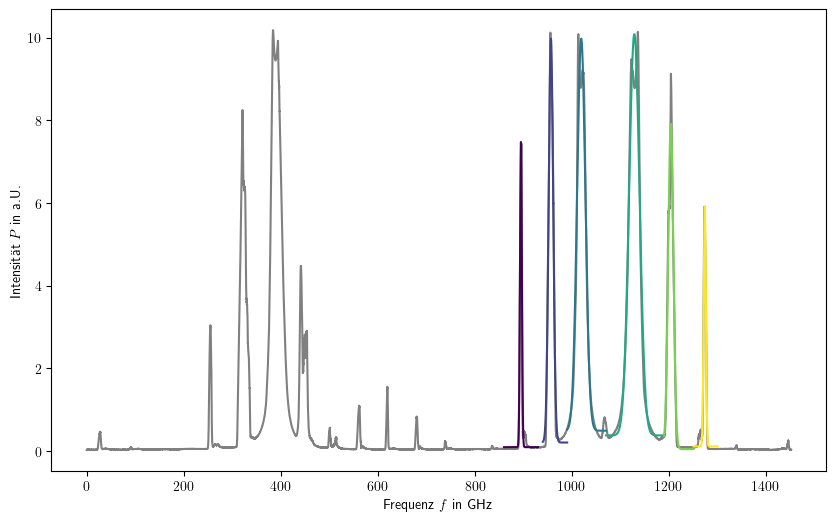

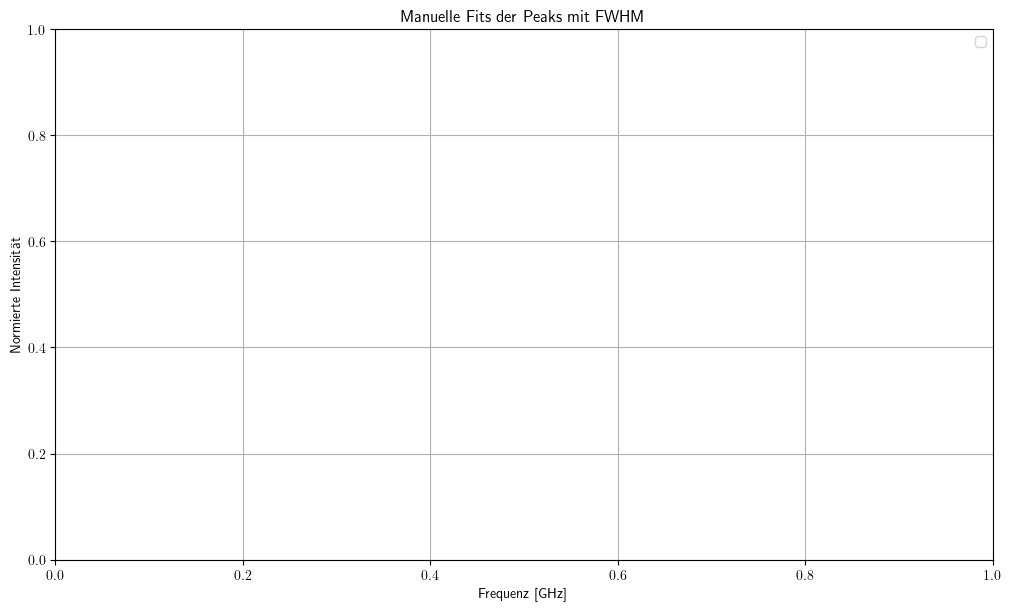

In [430]:
def gauss(x, A, mu, sigma, c):
    """Gaußfunktion: A = Amplitude, mu = Mittelwert, sigma = Standardabweichung, c = Offset"""
    return A * np.exp(-((x - mu)**2) / (2 * sigma**2)) + c


# Beispiel: manuelle Bereiche um Peaks in GHz
fit_bereiche = [
    (860, 930),
    (940, 990),
    (990, 1070),
    (1070, 1190),
    (1190, 1250),
    (1250, 1300)
]

fwhm_results = []
colors = plt.cm.viridis(np.linspace(0, 1, len(fit_bereiche)))

plt.figure(figsize=(10, 6))
plt.plot(f_30_30_werte_shifted, U_30_30, label="Originaldaten", color='gray')


for i, (start, end) in enumerate(fit_bereiche):
    mask = (f_30_30_werte_shifted >= start) & (f_30_30_werte_shifted <= end)
    x_fit = f_30_30_werte_shifted[mask]
    y_fit = U_30_30[mask]

    if len(x_fit) == 0:
        print(f"⚠️ Bereich {start}-{end} GHz enthält keine Daten, wird übersprungen.")
        continue

    # Startwerte: Amplitude, Mittelwert, Sigma, Offset
    p0 = [np.max(y_fit) - np.min(y_fit), x_fit[np.argmax(y_fit)], 5, np.min(y_fit)]

    try:
        popt, _ = curve_fit(gauss, x_fit, y_fit, p0=p0)
        A, mu, sigma, c = popt
        fwhm = 2.3548 * abs(sigma)  # Gauß: FWHM = 2.3548 * σ

        # Speichern
        fwhm_results.append((mu, fwhm))

        # Ausgabe der Fit-Parameter
        print(f"Fit {i+1}: μ = {mu:.1f} GHz, σ = {sigma:.1f}, FWHM = {fwhm:.1f}")

        # Plot Fit
        x_model = np.linspace(start, end, 300)
        y_model = gauss(x_model, *popt)
        plt.plot(x_model, y_model, label=f"Fit {i+1}: μ={mu:.1f} GHz, FWHM={fwhm:.1f}", color=colors[i])
        plt.xlabel("Frequenz $f$ in GHz")
        plt.ylabel("Intensität $P$ in a.U.")

    except RuntimeError:
        print(f"❌ Fit fehlgeschlagen im Bereich {start}-{end} GHz")

plt.figure(figsize=(10, 6), constrained_layout=True)
plt.title("Manuelle Fits der Peaks mit FWHM")
plt.xlabel("Frequenz [GHz]")
plt.ylabel("Normierte Intensität")
plt.grid(True)
plt.legend()
#plt.tight_layout()
plt.show()


## Berechnung der durchschnittlichen FWHM

In [431]:
FWHM_avg = (4.4 + 11.0 + 20.1 + 25.4 + 12.5 + 5.2) / 6
print(FWHM_avg)

13.100000000000001


## Berechnung der FSR über: 

In [432]:
FSR_5 = 1273.5 - 1203.5
FSR_4 = 1203.5 - 1128.4
FSR_3 = 1128.4 - 1019.0
FSR_2 = 1019.0 - 956.6
FSR_1 = 956.6 - 894.8

avg_FSR = (FSR_1 + FSR_2 + FSR_3 + FSR_4 + FSR_5) / 5

print(avg_FSR)

75.74000000000001


## Berechnung der Finesse über F = FSR / FWHM

In [433]:
finesse = avg_FSR / FWHM_avg

print(finesse)

5.781679389312977


## Berechnung der Reflexivität über Formel: $r = \frac{2F^2 + \pi^2 - \pi\sqrt{4F^2 + \pi^2}}{2F^2}$

In [434]:
r = (2 * finesse**2 + np.pi**2 - np.pi * np.sqrt(4 * finesse**2 + np.pi**2)) / (2 * finesse**2)

print(r)

0.5845585142108326


# Bestimmung der Frequenzcharakteristik

### es wird der höchste Peak genommen ein gauß fit angelgt und mu, also die position bestimmt, wenn der nächste peak der gleich hoch ist gefunden wurde werden beide peaks betrachtet -> es gibt 2 mu werte

## T = 20

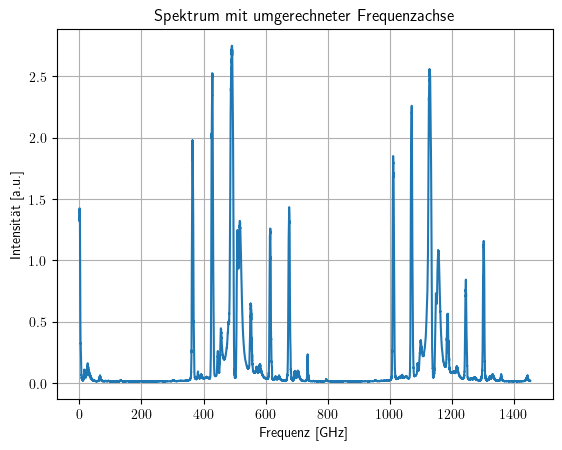

In [435]:
f_20_20_werte_shifted = f_20_20_werte - np.min(f_20_20_werte)

plt.plot(f_20_20_werte_shifted, U_20_20)  
plt.xlabel("Frequenz [GHz]")
plt.ylabel("Intensität [a.u.]")
plt.title("Spektrum mit umgerechneter Frequenzachse")
plt.grid(True)
plt.show()

In [436]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Beispiel für eine Gaussian-Funktion
def gauss(x, A, mu, sigma, c):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2)) + c

# Beispiel-Daten (ersetze dies mit deinen echten Daten)
# f_20_20_werte und U_20_20 sind die Frequenzen und Intensitäten
# f_20_20_werte_shifted = f_20_20_werte - np.min(f_20_20_werte)

# Liste von Intervallen, in denen gefittet werden soll (z.B. mehrere Bereiche)
intervals = [(300, 700), (800, 1200)]  # Beispiel-Intervalle

# Erstellen einer Figur für den Plot
plt.figure(figsize=(10, 6), constrained_layout=True)

# Schleife über die Intervalle
for start, end in intervals:
    # Maskieren der Daten im aktuellen Intervall
    mask = (f_20_20_werte_shifted >= start) & (f_20_20_werte_shifted <= end)
    x_fit = f_20_20_werte_shifted[mask]
    y_fit = U_20_20[mask]

    # Finden des höchsten Peaks im Intervall
    max_idx = np.argmax(y_fit)
    x_peak = x_fit[max_idx]
    y_peak = y_fit[max_idx]
    print(f"Höchster Peak im Intervall {start}-{end} GHz: {x_peak} GHz, Intensität: {y_peak}")

    # Startwerte für den Fit: Amplitude, Mittelwert, Sigma, Offset
    p0 = [y_peak - np.min(y_fit), x_peak, 5, np.min(y_fit)]

    # Fitten der Gauss-Funktion
    try:
        popt, _ = curve_fit(gauss, x_fit, y_fit, p0=p0)
        A, mu, sigma, c = popt
        fwhm = 2.3548 * abs(sigma)  # FWHM für Gauß

        # Ausgabe der Fit-Parameter
        print(f"Fit-Parameter für {start}-{end} GHz: μ = {mu:.1f} GHz, σ = {sigma:.1f}, FWHM = {fwhm:.1f}")

        # Plot für den aktuellen Fit
        plt.plot(x_fit, gauss(x_fit, *popt), label=f"Fit {start}-{end} GHz: μ={mu:.1f} GHz, FWHM={fwhm:.1f}")

    except RuntimeError:
        print(f"❌ Fit fehlgeschlagen im Intervall {start}-{end} GHz")

# Plot der Originaldaten
plt.plot(f_20_20_werte_shifted, U_20_20, label="Originaldaten", color='gray')

# Plot-Einstellungen
plt.xlabel("Frequenz [GHz]")
plt.ylabel("Intensität [a.u.]")
plt.title("Spektrum mit mehreren Gauß-Fits")
plt.grid(True)
plt.legend()
plt.show()


Höchster Peak im Intervall 300-700 GHz: 491.03370990189956 GHz, Intensität: 2.7485868969
Fit-Parameter für 300-700 GHz: μ = 490.5 GHz, σ = 3.8, FWHM = 9.0
Höchster Peak im Intervall 800-1200 GHz: 1127.1395126627197 GHz, Intensität: 2.5592514405
Fit-Parameter für 800-1200 GHz: μ = 1127.8 GHz, σ = 4.2, FWHM = 9.9


RuntimeError: latex was not able to process the following string:
b'Fit 300-700 GHz: \\u03bc=490.5 GHz, FWHM=9.0'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmp67g0238q 240ca618799f9c098996f2934054434d.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./240ca618799f9c098996f2934054434d.tex
LaTeX2e <2022-11-01> patch level 1
L3 programming layer <2023-02-22>
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/article.cls
Document Class: article 2022/07/02 v1.4n Standard LaTeX document class
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2023/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2023/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/local/texlive/2023/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2023/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/local/texlive/2023/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/local/texlive/2023/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/local/texlive/2023/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/local/texlive/2023/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file 240ca618799f9c098996f2934054434d.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips

! LaTeX Error: Unicode character μ (U+03BC)
               not set up for use with LaTeX.

See the LaTeX manual or LaTeX Companion for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.29 {\sffamily Fit 300-700 GHz: μ
                                   =490.5 GHz, FWHM=9.0}%
No pages of output.
Transcript written on tmp67g0238q/240ca618799f9c098996f2934054434d.log.




<Figure size 1000x600 with 1 Axes>

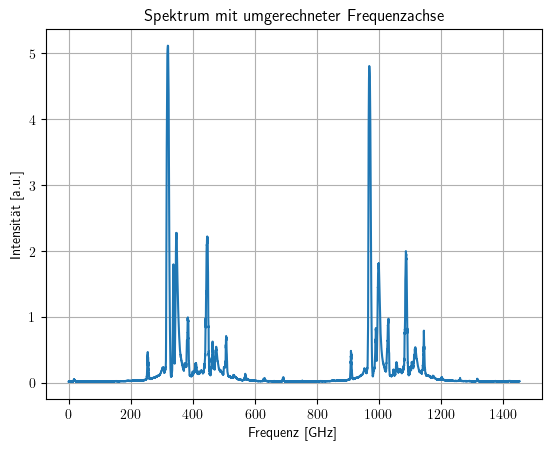

In [437]:
f_20_25_werte = (t_20_25) * factor

f_20_25_werte_shifted = f_20_25_werte - np.min(f_20_25_werte)

plt.plot(f_20_25_werte_shifted, U_20_25)  
plt.xlabel("Frequenz [GHz]")
plt.ylabel("Intensität [a.u.]")
plt.title("Spektrum mit umgerechneter Frequenzachse")
plt.grid(True)
plt.show()

In [438]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Beispiel für eine Gaussian-Funktion
def gauss(x, A, mu, sigma, c):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2)) + c

# Beispiel-Daten (ersetze dies mit deinen echten Daten)
# f_20_20_werte und U_20_20 sind die Frequenzen und Intensitäten
# f_20_20_werte_shifted = f_20_20_werte - np.min(f_20_20_werte)

# Liste von Intervallen, in denen gefittet werden soll (z.B. mehrere Bereiche)
intervals = [(300, 700), (800, 1200)]  # Beispiel-Intervalle

# Erstellen einer Figur für den Plot
plt.figure(figsize=(10, 6), constrained_layout=True)

# Schleife über die Intervalle
for start, end in intervals:
    # Maskieren der Daten im aktuellen Intervall
    mask = (f_20_25_werte_shifted >= start) & (f_20_25_werte_shifted <= end)
    x_fit = f_20_25_werte_shifted[mask]
    y_fit = U_20_25[mask]

    # Finden des höchsten Peaks im Intervall
    max_idx = np.argmax(y_fit)
    x_peak = x_fit[max_idx]
    y_peak = y_fit[max_idx]
    print(f"Höchster Peak im Intervall {start}-{end} GHz: {x_peak} GHz, Intensität: {y_peak}")

    # Startwerte für den Fit: Amplitude, Mittelwert, Sigma, Offset
    p0 = [y_peak - np.min(y_fit), x_peak, 5, np.min(y_fit)]

    # Fitten der Gauss-Funktion
    try:
        popt, _ = curve_fit(gauss, x_fit, y_fit, p0=p0)
        A, mu, sigma, c = popt
        fwhm = 2.3548 * abs(sigma)  # FWHM für Gauß

        # Ausgabe der Fit-Parameter
        print(f"Fit-Parameter für {start}-{end} GHz: μ = {mu:.1f} GHz, σ = {sigma:.1f}, FWHM = {fwhm:.1f}")

        # Plot für den aktuellen Fit
        plt.plot(x_fit, gauss(x_fit, *popt), label=f"Fit {start}-{end} GHz: μ={mu:.1f} GHz, FWHM={fwhm:.1f}")

    except RuntimeError:
        print(f"❌ Fit fehlgeschlagen im Intervall {start}-{end} GHz")

# Plot der Originaldaten
plt.plot(f_20_25_werte_shifted, U_20_20, label="Originaldaten", color='gray')

# Plot-Einstellungen
plt.xlabel("Frequenz [GHz]")
plt.ylabel("Intensität [a.u.]")
plt.title("Spektrum mit mehreren Gauß-Fits")
plt.grid(True)
plt.legend()
plt.show()


Höchster Peak im Intervall 300-700 GHz: 319.9763889358277 GHz, Intensität: 5.116237485
Fit-Parameter für 300-700 GHz: μ = 319.6 GHz, σ = 3.2, FWHM = 7.5
Höchster Peak im Intervall 800-1200 GHz: 967.9594249162014 GHz, Intensität: 4.8088245718
Fit-Parameter für 800-1200 GHz: μ = 969.1 GHz, σ = 3.0, FWHM = 7.1


RuntimeError: latex was not able to process the following string:
b'Fit 300-700 GHz: \\u03bc=319.6 GHz, FWHM=7.5'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpnz1qqkwh c20da4e6962d8756cce007fce054b364.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./c20da4e6962d8756cce007fce054b364.tex
LaTeX2e <2022-11-01> patch level 1
L3 programming layer <2023-02-22>
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/article.cls
Document Class: article 2022/07/02 v1.4n Standard LaTeX document class
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2023/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2023/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/local/texlive/2023/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2023/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/local/texlive/2023/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/local/texlive/2023/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/local/texlive/2023/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/local/texlive/2023/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file c20da4e6962d8756cce007fce054b364.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips

! LaTeX Error: Unicode character μ (U+03BC)
               not set up for use with LaTeX.

See the LaTeX manual or LaTeX Companion for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.29 {\sffamily Fit 300-700 GHz: μ
                                   =319.6 GHz, FWHM=7.5}%
No pages of output.
Transcript written on tmpnz1qqkwh/c20da4e6962d8756cce007fce054b364.log.




<Figure size 1000x600 with 1 Axes>

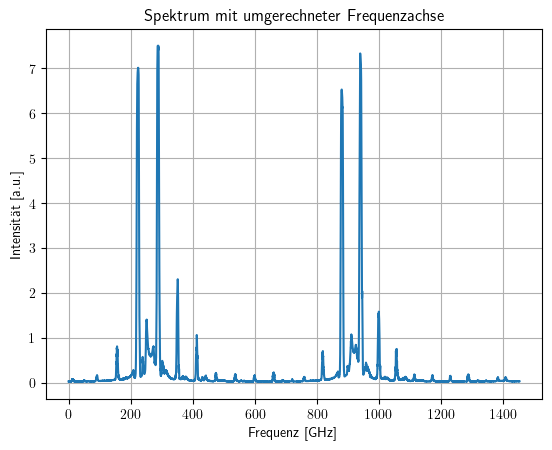

In [439]:
f_20_30_werte = (t_20_30) * factor

f_20_30_werte_shifted = f_20_30_werte - np.min(f_20_30_werte)

plt.plot(f_20_30_werte_shifted, U_20_30)  
plt.xlabel("Frequenz [GHz]")
plt.ylabel("Intensität [a.u.]")
plt.title("Spektrum mit umgerechneter Frequenzachse")
plt.grid(True)
plt.show()

In [440]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Beispiel für eine Gaussian-Funktion
def gauss(x, A, mu, sigma, c):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2)) + c

# Beispiel-Daten (ersetze dies mit deinen echten Daten)
# f_20_20_werte und U_20_20 sind die Frequenzen und Intensitäten
# f_20_20_werte_shifted = f_20_20_werte - np.min(f_20_20_werte)

# Liste von Intervallen, in denen gefittet werden soll (z.B. mehrere Bereiche)
intervals = [(200, 400), (800, 1200)]  # Beispiel-Intervalle

# Erstellen einer Figur für den Plot
plt.figure(figsize=(10, 6), constrained_layout=True)

# Schleife über die Intervalle
for start, end in intervals:
    # Maskieren der Daten im aktuellen Intervall
    mask = (f_20_30_werte_shifted >= start) & (f_20_30_werte_shifted <= end)
    x_fit = f_20_30_werte_shifted[mask]
    y_fit = U_20_30[mask]

    # Finden des höchsten Peaks im Intervall
    max_idx = np.argmax(y_fit)
    x_peak = x_fit[max_idx]
    y_peak = y_fit[max_idx]
    print(f"Höchster Peak im Intervall {start}-{end} GHz: {x_peak} GHz, Intensität: {y_peak}")

    # Startwerte für den Fit: Amplitude, Mittelwert, Sigma, Offset
    p0 = [y_peak - np.min(y_fit), x_peak, 5, np.min(y_fit)]

    # Fitten der Gauss-Funktion
    try:
        popt, _ = curve_fit(gauss, x_fit, y_fit, p0=p0)
        A, mu, sigma, c = popt
        fwhm = 2.3548 * abs(sigma)  # FWHM für Gauß

        # Ausgabe der Fit-Parameter
        print(f"Fit-Parameter für {start}-{end} GHz: μ = {mu:.1f} GHz, σ = {sigma:.1f}, FWHM = {fwhm:.1f}")

        # Plot für den aktuellen Fit
        plt.plot(x_fit, gauss(x_fit, *popt), label=f"Fit {start}-{end} GHz: μ={mu:.1f} GHz, FWHM={fwhm:.1f}")

    except RuntimeError:
        print(f"❌ Fit fehlgeschlagen im Intervall {start}-{end} GHz")

# Plot der Originaldaten
plt.plot(f_20_30_werte_shifted, U_20_30, label="Originaldaten", color='gray')

# Plot-Einstellungen
plt.xlabel("Frequenz [GHz]")
plt.ylabel("Intensität [a.u.]")
plt.title("Spektrum mit mehreren Gauß-Fits")
plt.grid(True)
plt.legend()
plt.show()


Höchster Peak im Intervall 200-400 GHz: 287.77309414009335 GHz, Intensität: 7.4963363087
Fit-Parameter für 200-400 GHz: μ = 287.9 GHz, σ = 2.7, FWHM = 6.3
Höchster Peak im Intervall 800-1200 GHz: 938.7272530362569 GHz, Intensität: 7.3258797982
Fit-Parameter für 800-1200 GHz: μ = 939.9 GHz, σ = 2.9, FWHM = 6.8


RuntimeError: latex was not able to process the following string:
b'Fit 200-400 GHz: \\u03bc=287.9 GHz, FWHM=6.3'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpom7p48yf 5cd7060ea1883eacb45d548fe293a82c.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./5cd7060ea1883eacb45d548fe293a82c.tex
LaTeX2e <2022-11-01> patch level 1
L3 programming layer <2023-02-22>
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/article.cls
Document Class: article 2022/07/02 v1.4n Standard LaTeX document class
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2023/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2023/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/local/texlive/2023/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2023/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/local/texlive/2023/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/local/texlive/2023/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/local/texlive/2023/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/local/texlive/2023/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file 5cd7060ea1883eacb45d548fe293a82c.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips

! LaTeX Error: Unicode character μ (U+03BC)
               not set up for use with LaTeX.

See the LaTeX manual or LaTeX Companion for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.29 {\sffamily Fit 200-400 GHz: μ
                                   =287.9 GHz, FWHM=6.3}%
No pages of output.
Transcript written on tmpom7p48yf/5cd7060ea1883eacb45d548fe293a82c.log.




<Figure size 1000x600 with 1 Axes>

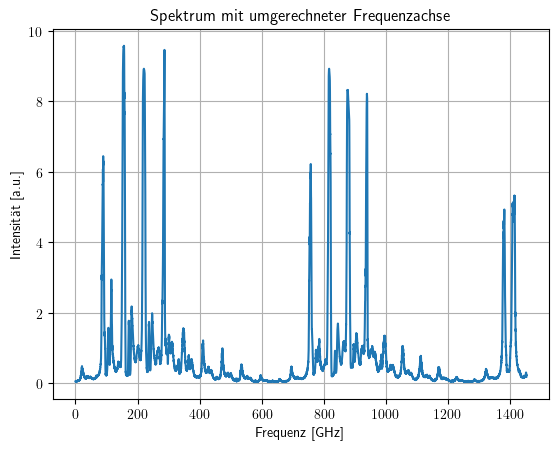

In [441]:
f_20_35_werte = (t_20_35) * factor

f_20_35_werte_shifted = f_20_35_werte - np.min(f_20_35_werte)

plt.plot(f_20_35_werte_shifted, U_20_35)  
plt.xlabel("Frequenz [GHz]")
plt.ylabel("Intensität [a.u.]")
plt.title("Spektrum mit umgerechneter Frequenzachse")
plt.grid(True)
plt.show()

In [442]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Beispiel für eine Gaussian-Funktion
def gauss(x, A, mu, sigma, c):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2)) + c

# Beispiel-Daten (ersetze dies mit deinen echten Daten)
# f_20_20_werte und U_20_20 sind die Frequenzen und Intensitäten
# f_20_20_werte_shifted = f_20_20_werte - np.min(f_20_20_werte)

# Liste von Intervallen, in denen gefittet werden soll (z.B. mehrere Bereiche)
intervals = [(100, 400), (600, 1100), (1200, 1450)]  # Beispiel-Intervalle

# Erstellen einer Figur für den Plot
plt.figure(figsize=(10, 6), constrained_layout=True)

# Schleife über die Intervalle
for start, end in intervals:
    # Maskieren der Daten im aktuellen Intervall
    mask = (f_20_35_werte_shifted >= start) & (f_20_35_werte_shifted <= end)
    x_fit = f_20_35_werte_shifted[mask]
    y_fit = U_20_35[mask]

    # Finden des höchsten Peaks im Intervall
    max_idx = np.argmax(y_fit)
    x_peak = x_fit[max_idx]
    y_peak = y_fit[max_idx]
    print(f"Höchster Peak im Intervall {start}-{end} GHz: {x_peak} GHz, Intensität: {y_peak}")

    # Startwerte für den Fit: Amplitude, Mittelwert, Sigma, Offset
    p0 = [y_peak - np.min(y_fit), x_peak, 5, np.min(y_fit)]

    # Fitten der Gauss-Funktion
    try:
        popt, _ = curve_fit(gauss, x_fit, y_fit, p0=p0)
        A, mu, sigma, c = popt
        fwhm = 2.3548 * abs(sigma)  # FWHM für Gauß

        # Ausgabe der Fit-Parameter
        print(f"Fit-Parameter für {start}-{end} GHz: μ = {mu:.1f} GHz, σ = {sigma:.1f}, FWHM = {fwhm:.1f}")

        # Plot für den aktuellen Fit
        plt.plot(x_fit, gauss(x_fit, *popt), label=f"Fit {start}-{end} GHz: μ={mu:.1f} GHz, FWHM={fwhm:.1f}")

    except RuntimeError:
        print(f"❌ Fit fehlgeschlagen im Intervall {start}-{end} GHz")

# Plot der Originaldaten
plt.plot(f_20_35_werte_shifted, U_20_35, label="Originaldaten", color='gray')

# Plot-Einstellungen
plt.xlabel("Frequenz [GHz]")
plt.ylabel("Intensität [a.u.]")
plt.title("Spektrum mit mehreren Gauß-Fits")
plt.grid(True)
plt.legend()
plt.show()


Höchster Peak im Intervall 100-400 GHz: 155.95975826694473 GHz, Intensität: 9.579170503
Fit-Parameter für 100-400 GHz: μ = 154.9 GHz, σ = 3.0, FWHM = 7.0
Höchster Peak im Intervall 600-1100 GHz: 816.4611899853448 GHz, Intensität: 8.9270068213
Fit-Parameter für 600-1100 GHz: μ = 817.2 GHz, σ = 3.1, FWHM = 7.2
Höchster Peak im Intervall 1200-1450 GHz: 1412.928632217351 GHz, Intensität: 5.3293336191
Fit-Parameter für 1200-1450 GHz: μ = 1410.1 GHz, σ = 4.5, FWHM = 10.6


RuntimeError: latex was not able to process the following string:
b'Fit 100-400 GHz: \\u03bc=154.9 GHz, FWHM=7.0'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmp4p5ipz8g 0760953654f665c2c8429b3df0f8b5f4.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./0760953654f665c2c8429b3df0f8b5f4.tex
LaTeX2e <2022-11-01> patch level 1
L3 programming layer <2023-02-22>
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/article.cls
Document Class: article 2022/07/02 v1.4n Standard LaTeX document class
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2023/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2023/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/local/texlive/2023/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2023/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/local/texlive/2023/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/local/texlive/2023/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/local/texlive/2023/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/local/texlive/2023/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file 0760953654f665c2c8429b3df0f8b5f4.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips

! LaTeX Error: Unicode character μ (U+03BC)
               not set up for use with LaTeX.

See the LaTeX manual or LaTeX Companion for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.29 {\sffamily Fit 100-400 GHz: μ
                                   =154.9 GHz, FWHM=7.0}%
No pages of output.
Transcript written on tmp4p5ipz8g/0760953654f665c2c8429b3df0f8b5f4.log.




<Figure size 1000x600 with 1 Axes>

## T=25

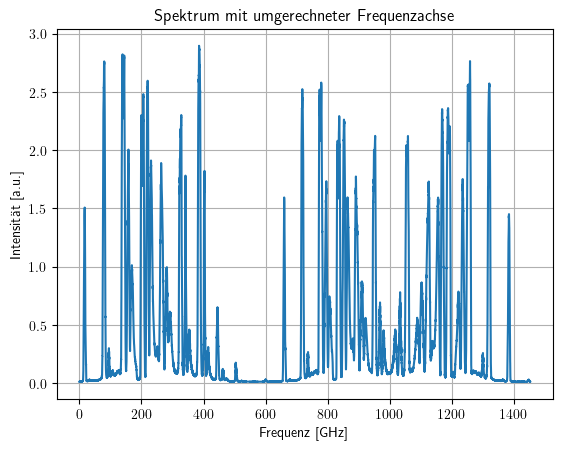

In [443]:
f_25_20_werte_shifted = f_25_20_werte - np.min(f_25_20_werte)

plt.plot(f_25_20_werte_shifted, U_25_20)  
plt.xlabel("Frequenz [GHz]")
plt.ylabel("Intensität [a.u.]")
plt.title("Spektrum mit umgerechneter Frequenzachse")
plt.grid(True)
plt.show()

In [444]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Beispiel für eine Gaussian-Funktion
def gauss(x, A, mu, sigma, c):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2)) + c

# Beispiel-Daten (ersetze dies mit deinen echten Daten)
# f_20_20_werte und U_20_20 sind die Frequenzen und Intensitäten
# f_20_20_werte_shifted = f_20_20_werte - np.min(f_20_20_werte)

# Liste von Intervallen, in denen gefittet werden soll (z.B. mehrere Bereiche)
intervals = [(0, 500), (600, 1400)]  # Beispiel-Intervalle

# Erstellen einer Figur für den Plot
plt.figure(figsize=(10, 6), constrained_layout=True)

# Schleife über die Intervalle
for start, end in intervals:
    # Maskieren der Daten im aktuellen Intervall
    mask = (f_25_20_werte_shifted >= start) & (f_25_20_werte_shifted <= end)
    x_fit = f_25_20_werte_shifted[mask]
    y_fit = U_25_20[mask]

    # Finden des höchsten Peaks im Intervall
    max_idx = np.argmax(y_fit)
    x_peak = x_fit[max_idx]
    y_peak = y_fit[max_idx]
    print(f"Höchster Peak im Intervall {start}-{end} GHz: {x_peak} GHz, Intensität: {y_peak}")

    # Startwerte für den Fit: Amplitude, Mittelwert, Sigma, Offset
    p0 = [y_peak - np.min(y_fit), x_peak, 5, np.min(y_fit)]

    # Fitten der Gauss-Funktion
    try:
        popt, _ = curve_fit(gauss, x_fit, y_fit, p0=p0)
        A, mu, sigma, c = popt
        fwhm = 2.3548 * abs(sigma)  # FWHM für Gauß

        # Ausgabe der Fit-Parameter
        print(f"Fit-Parameter für {start}-{end} GHz: μ = {mu:.1f} GHz, σ = {sigma:.1f}, FWHM = {fwhm:.1f}")

        # Plot für den aktuellen Fit
        plt.plot(x_fit, gauss(x_fit, *popt), label=f"Fit {start}-{end} GHz: μ={mu:.1f} GHz, FWHM={fwhm:.1f}")

    except RuntimeError:
        print(f"❌ Fit fehlgeschlagen im Intervall {start}-{end} GHz")

# Plot der Originaldaten
plt.plot(f_25_20_werte_shifted, U_25_20, label="Originaldaten", color='gray')

# Plot-Einstellungen
plt.xlabel("Frequenz [GHz]")
plt.ylabel("Intensität [a.u.]")
plt.title("Spektrum mit mehreren Gauß-Fits")
plt.grid(True)
plt.legend()
plt.show()


Höchster Peak im Intervall 0-500 GHz: 385.37496582002746 GHz, Intensität: 2.8952369743
Fit-Parameter für 0-500 GHz: μ = 385.9 GHz, σ = 2.8, FWHM = 6.6
Höchster Peak im Intervall 600-1400 GHz: 1257.694718310941 GHz, Intensität: 2.7637127482
Fit-Parameter für 600-1400 GHz: μ = 1254.0 GHz, σ = 4.1, FWHM = 9.7


RuntimeError: latex was not able to process the following string:
b'Fit 0-500 GHz: \\u03bc=385.9 GHz, FWHM=6.6'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpjqmkoo9e e9f52e7e9411509060e7117d87ecd64f.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./e9f52e7e9411509060e7117d87ecd64f.tex
LaTeX2e <2022-11-01> patch level 1
L3 programming layer <2023-02-22>
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/article.cls
Document Class: article 2022/07/02 v1.4n Standard LaTeX document class
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2023/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2023/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/local/texlive/2023/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2023/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/local/texlive/2023/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/local/texlive/2023/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/local/texlive/2023/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/local/texlive/2023/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file e9f52e7e9411509060e7117d87ecd64f.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips

! LaTeX Error: Unicode character μ (U+03BC)
               not set up for use with LaTeX.

See the LaTeX manual or LaTeX Companion for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.29 {\sffamily Fit 0-500 GHz: μ
                                 =385.9 GHz, FWHM=6.6}%
No pages of output.
Transcript written on tmpjqmkoo9e/e9f52e7e9411509060e7117d87ecd64f.log.




<Figure size 1000x600 with 1 Axes>

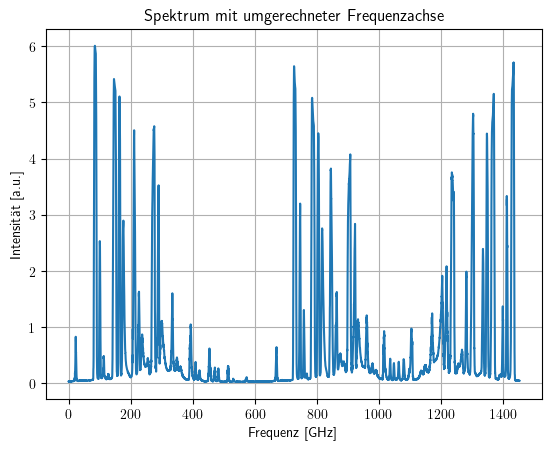

In [445]:
f_25_25_werte_shifted = f_25_25_werte - np.min(f_25_25_werte)

plt.plot(f_25_25_werte_shifted, U_25_25)  
plt.xlabel("Frequenz [GHz]")
plt.ylabel("Intensität [a.u.]")
plt.title("Spektrum mit umgerechneter Frequenzachse")
plt.grid(True)
plt.show()

In [446]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Beispiel für eine Gaussian-Funktion
def gauss(x, A, mu, sigma, c):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2)) + c

# Beispiel-Daten (ersetze dies mit deinen echten Daten)
# f_20_20_werte und U_20_20 sind die Frequenzen und Intensitäten
# f_20_20_werte_shifted = f_20_20_werte - np.min(f_20_20_werte)

# Liste von Intervallen, in denen gefittet werden soll (z.B. mehrere Bereiche)
intervals = [(0, 500), (600, 1100), (1100, 1450)]  # Beispiel-Intervalle

# Erstellen einer Figur für den Plot
plt.figure(figsize=(10, 6), constrained_layout=True)

# Schleife über die Intervalle
for start, end in intervals:
    # Maskieren der Daten im aktuellen Intervall
    mask = (f_25_25_werte_shifted >= start) & (f_25_25_werte_shifted <= end)
    x_fit = f_25_25_werte_shifted[mask]
    y_fit = U_25_25[mask]

    # Finden des höchsten Peaks im Intervall
    max_idx = np.argmax(y_fit)
    x_peak = x_fit[max_idx]
    y_peak = y_fit[max_idx]
    print(f"Höchster Peak im Intervall {start}-{end} GHz: {x_peak} GHz, Intensität: {y_peak}")

    # Startwerte für den Fit: Amplitude, Mittelwert, Sigma, Offset
    p0 = [y_peak - np.min(y_fit), x_peak, 5, np.min(y_fit)]

    # Fitten der Gauss-Funktion
    try:
        popt, _ = curve_fit(gauss, x_fit, y_fit, p0=p0)
        A, mu, sigma, c = popt
        fwhm = 2.3548 * abs(sigma)  # FWHM für Gauß

        # Ausgabe der Fit-Parameter
        print(f"Fit-Parameter für {start}-{end} GHz: μ = {mu:.1f} GHz, σ = {sigma:.1f}, FWHM = {fwhm:.1f}")

        # Plot für den aktuellen Fit
        plt.plot(x_fit, gauss(x_fit, *popt), label=f"Fit {start}-{end} GHz: μ={mu:.1f} GHz, FWHM={fwhm:.1f}")

    except RuntimeError:
        print(f"❌ Fit fehlgeschlagen im Intervall {start}-{end} GHz")

# Plot der Originaldaten
plt.plot(f_25_25_werte_shifted, U_25_25, label="Originaldaten", color='gray')

# Plot-Einstellungen
plt.xlabel("Frequenz [GHz]")
plt.ylabel("Intensität [a.u.]")
plt.title("Spektrum mit mehreren Gauß-Fits")
plt.grid(True)
plt.legend()
plt.show()


Höchster Peak im Intervall 0-500 GHz: 84.60925762635839 GHz, Intensität: 6.0084228288
Fit-Parameter für 0-500 GHz: μ = 85.8 GHz, σ = 2.7, FWHM = 6.4
Höchster Peak im Intervall 600-1100 GHz: 725.7853251936355 GHz, Intensität: 5.6414245269
Fit-Parameter für 600-1100 GHz: μ = 728.0 GHz, σ = 2.9, FWHM = 6.8
Höchster Peak im Intervall 1100-1450 GHz: 1432.7441832599554 GHz, Intensität: 5.7123578864
Fit-Parameter für 1100-1450 GHz: μ = 1429.9 GHz, σ = 3.1, FWHM = 7.3


RuntimeError: latex was not able to process the following string:
b'Fit 0-500 GHz: \\u03bc=85.8 GHz, FWHM=6.4'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpqgncl911 3a182e6970f13bbff5db0713a603f9ce.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./3a182e6970f13bbff5db0713a603f9ce.tex
LaTeX2e <2022-11-01> patch level 1
L3 programming layer <2023-02-22>
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/article.cls
Document Class: article 2022/07/02 v1.4n Standard LaTeX document class
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2023/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2023/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/local/texlive/2023/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2023/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/local/texlive/2023/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/local/texlive/2023/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/local/texlive/2023/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/local/texlive/2023/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file 3a182e6970f13bbff5db0713a603f9ce.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips

! LaTeX Error: Unicode character μ (U+03BC)
               not set up for use with LaTeX.

See the LaTeX manual or LaTeX Companion for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.29 {\sffamily Fit 0-500 GHz: μ
                                 =85.8 GHz, FWHM=6.4}%
No pages of output.
Transcript written on tmpqgncl911/3a182e6970f13bbff5db0713a603f9ce.log.




<Figure size 1000x600 with 1 Axes>

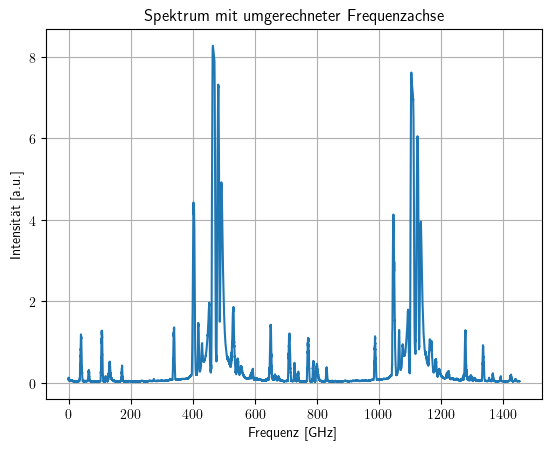

In [447]:
f_25_30_werte_shifted = f_25_30_werte - np.min(f_25_30_werte)

plt.plot(f_25_30_werte_shifted, U_25_30)  
plt.xlabel("Frequenz [GHz]")
plt.ylabel("Intensität [a.u.]")
plt.title("Spektrum mit umgerechneter Frequenzachse")
plt.grid(True)
plt.show()

In [448]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Beispiel für eine Gaussian-Funktion
def gauss(x, A, mu, sigma, c):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2)) + c

# Beispiel-Daten (ersetze dies mit deinen echten Daten)
# f_20_20_werte und U_20_20 sind die Frequenzen und Intensitäten
# f_20_20_werte_shifted = f_20_20_werte - np.min(f_20_20_werte)

# Liste von Intervallen, in denen gefittet werden soll (z.B. mehrere Bereiche)
intervals = [(300, 600), (1000, 1200)]  # Beispiel-Intervalle

# Erstellen einer Figur für den Plot
plt.figure(figsize=(10, 6), constrained_layout=True)

# Schleife über die Intervalle
for start, end in intervals:
    # Maskieren der Daten im aktuellen Intervall
    mask = (f_25_30_werte_shifted >= start) & (f_25_30_werte_shifted <= end)
    x_fit = f_25_30_werte_shifted[mask]
    y_fit = U_25_30[mask]

    # Finden des höchsten Peaks im Intervall
    max_idx = np.argmax(y_fit)
    x_peak = x_fit[max_idx]
    y_peak = y_fit[max_idx]
    print(f"Höchster Peak im Intervall {start}-{end} GHz: {x_peak} GHz, Intensität: {y_peak}")

    # Startwerte für den Fit: Amplitude, Mittelwert, Sigma, Offset
    p0 = [y_peak - np.min(y_fit), x_peak, 5, np.min(y_fit)]

    # Fitten der Gauss-Funktion
    try:
        popt, _ = curve_fit(gauss, x_fit, y_fit, p0=p0)
        A, mu, sigma, c = popt
        fwhm = 2.3548 * abs(sigma)  # FWHM für Gauß

        # Ausgabe der Fit-Parameter
        print(f"Fit-Parameter für {start}-{end} GHz: μ = {mu:.1f} GHz, σ = {sigma:.1f}, FWHM = {fwhm:.1f}")

        # Plot für den aktuellen Fit
        plt.plot(x_fit, gauss(x_fit, *popt), label=f"Fit {start}-{end} GHz: μ={mu:.1f} GHz, FWHM={fwhm:.1f}")

    except RuntimeError:
        print(f"❌ Fit fehlgeschlagen im Intervall {start}-{end} GHz")

# Plot der Originaldaten
plt.plot(f_25_30_werte_shifted, U_25_30, label="Originaldaten", color='gray')

# Plot-Einstellungen
plt.xlabel("Frequenz [GHz]")
plt.ylabel("Intensität [a.u.]")
plt.title("Spektrum mit mehreren Gauß-Fits")
plt.grid(True)
plt.legend()
plt.show()


Höchster Peak im Intervall 300-600 GHz: 464.5403907423737 GHz, Intensität: 8.2741158867
Fit-Parameter für 300-600 GHz: μ = 466.7 GHz, σ = 3.7, FWHM = 8.7
Höchster Peak im Intervall 1000-1200 GHz: 1103.356012449191 GHz, Intensität: 7.6160339884
Fit-Parameter für 1000-1200 GHz: μ = 1106.4 GHz, σ = 3.9, FWHM = 9.2


RuntimeError: latex was not able to process the following string:
b'Fit 300-600 GHz: \\u03bc=466.7 GHz, FWHM=8.7'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpbl96bul7 11f0f4d29ecfb07a0ab2378b66e62925.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./11f0f4d29ecfb07a0ab2378b66e62925.tex
LaTeX2e <2022-11-01> patch level 1
L3 programming layer <2023-02-22>
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/article.cls
Document Class: article 2022/07/02 v1.4n Standard LaTeX document class
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2023/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2023/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/local/texlive/2023/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2023/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/local/texlive/2023/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/local/texlive/2023/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/local/texlive/2023/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/local/texlive/2023/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file 11f0f4d29ecfb07a0ab2378b66e62925.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips

! LaTeX Error: Unicode character μ (U+03BC)
               not set up for use with LaTeX.

See the LaTeX manual or LaTeX Companion for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.29 {\sffamily Fit 300-600 GHz: μ
                                   =466.7 GHz, FWHM=8.7}%
No pages of output.
Transcript written on tmpbl96bul7/11f0f4d29ecfb07a0ab2378b66e62925.log.




<Figure size 1000x600 with 1 Axes>

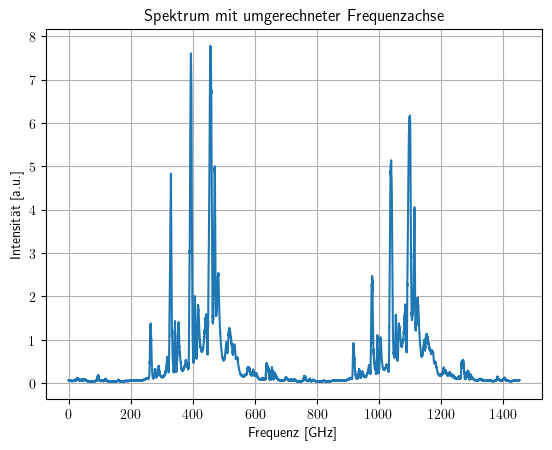

In [449]:
f_25_35_werte_shifted = f_25_35_werte - np.min(f_25_35_werte)

plt.plot(f_25_35_werte_shifted, U_25_35)  
plt.xlabel("Frequenz [GHz]")
plt.ylabel("Intensität [a.u.]")
plt.title("Spektrum mit umgerechneter Frequenzachse")
plt.grid(True)
plt.show()

In [450]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Beispiel für eine Gaussian-Funktion
def gauss(x, A, mu, sigma, c):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2)) + c

# Beispiel-Daten (ersetze dies mit deinen echten Daten)
# f_20_20_werte und U_20_20 sind die Frequenzen und Intensitäten
# f_20_20_werte_shifted = f_20_20_werte - np.min(f_20_20_werte)

# Liste von Intervallen, in denen gefittet werden soll (z.B. mehrere Bereiche)
intervals = [(300, 600), (1000, 1200)]  # Beispiel-Intervalle

# Erstellen einer Figur für den Plot
plt.figure(figsize=(10, 6), constrained_layout=True)

# Schleife über die Intervalle
for start, end in intervals:
    # Maskieren der Daten im aktuellen Intervall
    mask = (f_25_35_werte_shifted >= start) & (f_25_35_werte_shifted <= end)
    x_fit = f_25_35_werte_shifted[mask]
    y_fit = U_25_35[mask]

    # Finden des höchsten Peaks im Intervall
    max_idx = np.argmax(y_fit)
    x_peak = x_fit[max_idx]
    y_peak = y_fit[max_idx]
    print(f"Höchster Peak im Intervall {start}-{end} GHz: {x_peak} GHz, Intensität: {y_peak}")

    # Startwerte für den Fit: Amplitude, Mittelwert, Sigma, Offset
    p0 = [y_peak - np.min(y_fit), x_peak, 5, np.min(y_fit)]

    # Fitten der Gauss-Funktion
    try:
        popt, _ = curve_fit(gauss, x_fit, y_fit, p0=p0)
        A, mu, sigma, c = popt
        fwhm = 2.3548 * abs(sigma)  # FWHM für Gauß

        # Ausgabe der Fit-Parameter
        print(f"Fit-Parameter für {start}-{end} GHz: μ = {mu:.1f} GHz, σ = {sigma:.1f}, FWHM = {fwhm:.1f}")

        # Plot für den aktuellen Fit
        plt.plot(x_fit, gauss(x_fit, *popt), label=f"Fit {start}-{end} GHz: μ={mu:.1f} GHz, FWHM={fwhm:.1f}")

    except RuntimeError:
        print(f"❌ Fit fehlgeschlagen im Intervall {start}-{end} GHz")

# Plot der Originaldaten
plt.plot(f_25_35_werte_shifted, U_25_35, label="Originaldaten", color='gray')

# Plot-Einstellungen
plt.xlabel("Frequenz [GHz]")
plt.ylabel("Intensität [a.u.]")
plt.title("Spektrum mit mehreren Gauß-Fits")
plt.grid(True)
plt.legend()
plt.show()


Höchster Peak im Intervall 300-600 GHz: 456.4835183404356 GHz, Intensität: 7.7833885112
Fit-Parameter für 300-600 GHz: μ = 456.9 GHz, σ = 3.4, FWHM = 7.9
Höchster Peak im Intervall 1000-1200 GHz: 1098.7735150530136 GHz, Intensität: 6.177700986
Fit-Parameter für 1000-1200 GHz: μ = 1097.4 GHz, σ = 3.8, FWHM = 9.0


RuntimeError: latex was not able to process the following string:
b'Fit 300-600 GHz: \\u03bc=456.9 GHz, FWHM=7.9'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpp7q6nlmv 7ce62cf023d482a5755e43d90351888e.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./7ce62cf023d482a5755e43d90351888e.tex
LaTeX2e <2022-11-01> patch level 1
L3 programming layer <2023-02-22>
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/article.cls
Document Class: article 2022/07/02 v1.4n Standard LaTeX document class
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2023/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2023/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/local/texlive/2023/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2023/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/local/texlive/2023/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/local/texlive/2023/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/local/texlive/2023/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/local/texlive/2023/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file 7ce62cf023d482a5755e43d90351888e.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips

! LaTeX Error: Unicode character μ (U+03BC)
               not set up for use with LaTeX.

See the LaTeX manual or LaTeX Companion for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.29 {\sffamily Fit 300-600 GHz: μ
                                   =456.9 GHz, FWHM=7.9}%
No pages of output.
Transcript written on tmpp7q6nlmv/7ce62cf023d482a5755e43d90351888e.log.




<Figure size 1000x600 with 1 Axes>

## T = 30

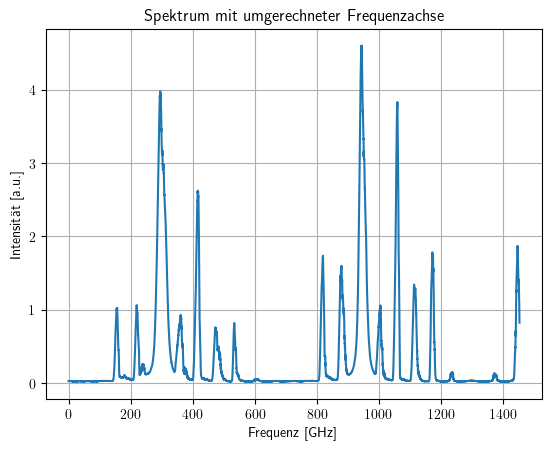

In [451]:
f_30_20_werte_shifted = f_30_20_werte - np.min(f_30_20_werte)

plt.plot(f_30_20_werte_shifted, U_30_20)  
plt.xlabel("Frequenz [GHz]")
plt.ylabel("Intensität [a.u.]")
plt.title("Spektrum mit umgerechneter Frequenzachse")
plt.grid(True)
plt.show()

In [452]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Beispiel für eine Gaussian-Funktion
def gauss(x, A, mu, sigma, c):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2)) + c

# Beispiel-Daten (ersetze dies mit deinen echten Daten)
# f_20_20_werte und U_20_20 sind die Frequenzen und Intensitäten
# f_20_20_werte_shifted = f_20_20_werte - np.min(f_20_20_werte)

# Liste von Intervallen, in denen gefittet werden soll (z.B. mehrere Bereiche)
intervals = [(200, 700), (700, 1200)]  # Beispiel-Intervalle

# Erstellen einer Figur für den Plot
plt.figure(figsize=(10, 6), constrained_layout=True)

# Schleife über die Intervalle
for start, end in intervals:
    # Maskieren der Daten im aktuellen Intervall
    mask = (f_30_20_werte_shifted >= start) & (f_30_20_werte_shifted <= end)
    x_fit = f_30_20_werte_shifted[mask]
    y_fit = U_30_20[mask]

    # Finden des höchsten Peaks im Intervall
    max_idx = np.argmax(y_fit)
    x_peak = x_fit[max_idx]
    y_peak = y_fit[max_idx]
    print(f"Höchster Peak im Intervall {start}-{end} GHz: {x_peak} GHz, Intensität: {y_peak}")

    # Startwerte für den Fit: Amplitude, Mittelwert, Sigma, Offset
    p0 = [y_peak - np.min(y_fit), x_peak, 5, np.min(y_fit)]

    # Fitten der Gauss-Funktion
    try:
        popt, _ = curve_fit(gauss, x_fit, y_fit, p0=p0)
        A, mu, sigma, c = popt
        fwhm = 2.3548 * abs(sigma)  # FWHM für Gauß

        # Ausgabe der Fit-Parameter
        print(f"Fit-Parameter für {start}-{end} GHz: μ = {mu:.1f} GHz, σ = {sigma:.1f}, FWHM = {fwhm:.1f}")

        # Plot für den aktuellen Fit
        plt.plot(x_fit, gauss(x_fit, *popt), label=f"Fit {start}-{end} GHz: μ={mu:.1f} GHz, FWHM={fwhm:.1f}")

    except RuntimeError:
        print(f"❌ Fit fehlgeschlagen im Intervall {start}-{end} GHz")

# Plot der Originaldaten
plt.plot(f_30_20_werte_shifted, U_30_20, label="Originaldaten", color='gray')

# Plot-Einstellungen
plt.xlabel("Frequenz [GHz]")
plt.ylabel("Intensität [a.u.]")
plt.title("Spektrum mit mehreren Gauß-Fits")
plt.grid(True)
plt.legend()
plt.show()


Höchster Peak im Intervall 200-700 GHz: 295.2009014295677 GHz, Intensität: 3.9777338636
Fit-Parameter für 200-700 GHz: μ = 298.5 GHz, σ = 11.7, FWHM = 27.5
Höchster Peak im Intervall 700-1200 GHz: 943.5572633593767 GHz, Intensität: 4.5992963497
Fit-Parameter für 700-1200 GHz: μ = 944.9 GHz, σ = 8.5, FWHM = 20.1


RuntimeError: latex was not able to process the following string:
b'Fit 200-700 GHz: \\u03bc=298.5 GHz, FWHM=27.5'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpmou9lgch ad93b5c7034607b5c78ab9915e6bbf1b.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./ad93b5c7034607b5c78ab9915e6bbf1b.tex
LaTeX2e <2022-11-01> patch level 1
L3 programming layer <2023-02-22>
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/article.cls
Document Class: article 2022/07/02 v1.4n Standard LaTeX document class
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2023/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2023/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/local/texlive/2023/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2023/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/local/texlive/2023/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/local/texlive/2023/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/local/texlive/2023/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/local/texlive/2023/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file ad93b5c7034607b5c78ab9915e6bbf1b.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips

! LaTeX Error: Unicode character μ (U+03BC)
               not set up for use with LaTeX.

See the LaTeX manual or LaTeX Companion for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.29 {\sffamily Fit 200-700 GHz: μ
                                   =298.5 GHz, FWHM=27.5}%
No pages of output.
Transcript written on tmpmou9lgch/ad93b5c7034607b5c78ab9915e6bbf1b.log.




<Figure size 1000x600 with 1 Axes>

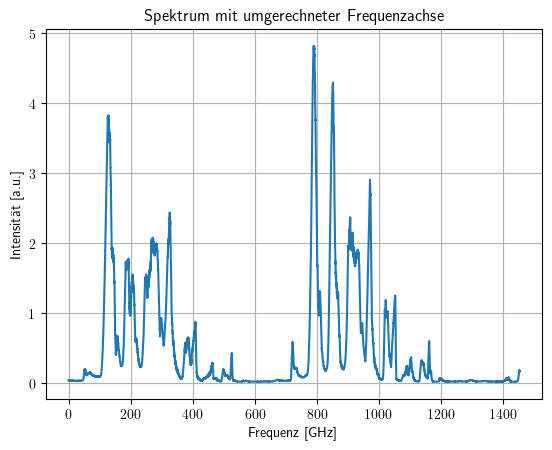

In [453]:
f_30_25_werte_shifted = f_30_25_werte - np.min(f_30_25_werte)

plt.plot(f_30_25_werte_shifted, U_30_25)  
plt.xlabel("Frequenz [GHz]")
plt.ylabel("Intensität [a.u.]")
plt.title("Spektrum mit umgerechneter Frequenzachse")
plt.grid(True)
plt.show()

In [454]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Beispiel für eine Gaussian-Funktion
def gauss(x, A, mu, sigma, c):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2)) + c

# Beispiel-Daten (ersetze dies mit deinen echten Daten)
# f_20_20_werte und U_20_20 sind die Frequenzen und Intensitäten
# f_20_20_werte_shifted = f_20_20_werte - np.min(f_20_20_werte)

# Liste von Intervallen, in denen gefittet werden soll (z.B. mehrere Bereiche)
intervals = [(200, 700), (700, 1200)]  # Beispiel-Intervalle

# Erstellen einer Figur für den Plot
plt.figure(figsize=(10, 6), constrained_layout=True)

# Schleife über die Intervalle
for start, end in intervals:
    # Maskieren der Daten im aktuellen Intervall
    mask = (f_30_25_werte_shifted >= start) & (f_30_25_werte_shifted <= end)
    x_fit = f_30_25_werte_shifted[mask]
    y_fit = U_30_25[mask]

    # Finden des höchsten Peaks im Intervall
    max_idx = np.argmax(y_fit)
    x_peak = x_fit[max_idx]
    y_peak = y_fit[max_idx]
    print(f"Höchster Peak im Intervall {start}-{end} GHz: {x_peak} GHz, Intensität: {y_peak}")

    # Startwerte für den Fit: Amplitude, Mittelwert, Sigma, Offset
    p0 = [y_peak - np.min(y_fit), x_peak, 5, np.min(y_fit)]

    # Fitten der Gauss-Funktion
    try:
        popt, _ = curve_fit(gauss, x_fit, y_fit, p0=p0)
        A, mu, sigma, c = popt
        fwhm = 2.3548 * abs(sigma)  # FWHM für Gauß

        # Ausgabe der Fit-Parameter
        print(f"Fit-Parameter für {start}-{end} GHz: μ = {mu:.1f} GHz, σ = {sigma:.1f}, FWHM = {fwhm:.1f}")

        # Plot für den aktuellen Fit
        plt.plot(x_fit, gauss(x_fit, *popt), label=f"Fit {start}-{end} GHz: μ={mu:.1f} GHz, FWHM={fwhm:.1f}")

    except RuntimeError:
        print(f"❌ Fit fehlgeschlagen im Intervall {start}-{end} GHz")

# Plot der Originaldaten
plt.plot(f_30_25_werte_shifted, U_30_25, label="Originaldaten", color='gray')

# Plot-Einstellungen
plt.xlabel("Frequenz [GHz]")
plt.ylabel("Intensität [a.u.]")
plt.title("Spektrum mit mehreren Gauß-Fits")
plt.grid(True)
plt.legend()
plt.show()


Höchster Peak im Intervall 200-700 GHz: 325.6621697600182 GHz, Intensität: 2.4394970033
Fit-Parameter für 200-700 GHz: μ = 323.4 GHz, σ = 6.9, FWHM = 16.2
Höchster Peak im Intervall 700-1200 GHz: 789.0847601871681 GHz, Intensität: 4.8174238053
Fit-Parameter für 700-1200 GHz: μ = 790.0 GHz, σ = 6.4, FWHM = 15.2


RuntimeError: latex was not able to process the following string:
b'Fit 200-700 GHz: \\u03bc=323.4 GHz, FWHM=16.2'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpepwbbpuj 324238ee38097de215586a14a68f1ad5.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./324238ee38097de215586a14a68f1ad5.tex
LaTeX2e <2022-11-01> patch level 1
L3 programming layer <2023-02-22>
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/article.cls
Document Class: article 2022/07/02 v1.4n Standard LaTeX document class
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2023/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2023/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/local/texlive/2023/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2023/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/local/texlive/2023/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/local/texlive/2023/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/local/texlive/2023/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/local/texlive/2023/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file 324238ee38097de215586a14a68f1ad5.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips

! LaTeX Error: Unicode character μ (U+03BC)
               not set up for use with LaTeX.

See the LaTeX manual or LaTeX Companion for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.29 {\sffamily Fit 200-700 GHz: μ
                                   =323.4 GHz, FWHM=16.2}%
No pages of output.
Transcript written on tmpepwbbpuj/324238ee38097de215586a14a68f1ad5.log.




<Figure size 1000x600 with 1 Axes>

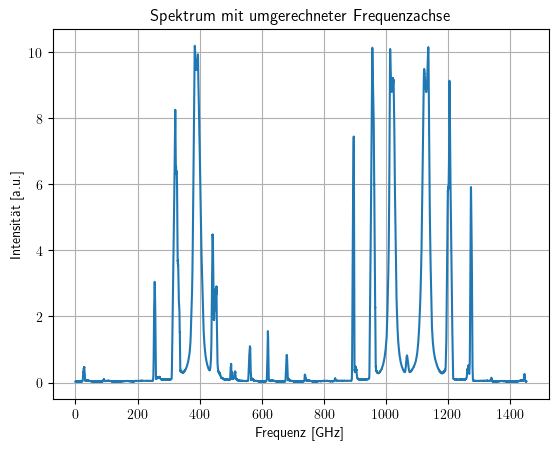

In [455]:
f_30_30_werte_shifted = f_30_30_werte - np.min(f_30_30_werte)

plt.plot(f_30_30_werte_shifted, U_30_30)  
plt.xlabel("Frequenz [GHz]")
plt.ylabel("Intensität [a.u.]")
plt.title("Spektrum mit umgerechneter Frequenzachse")
plt.grid(True)
plt.show()

In [456]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Beispiel für eine Gaussian-Funktion
def gauss(x, A, mu, sigma, c):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2)) + c

# Beispiel-Daten (ersetze dies mit deinen echten Daten)
# f_20_20_werte und U_20_20 sind die Frequenzen und Intensitäten
# f_20_20_werte_shifted = f_20_20_werte - np.min(f_20_20_werte)

# Liste von Intervallen, in denen gefittet werden soll (z.B. mehrere Bereiche)
intervals = [(200, 700), (700, 1200)]  # Beispiel-Intervalle

# Erstellen einer Figur für den Plot
plt.figure(figsize=(10, 6), constrained_layout=True)

# Schleife über die Intervalle
for start, end in intervals:
    # Maskieren der Daten im aktuellen Intervall
    mask = (f_30_30_werte_shifted >= start) & (f_30_30_werte_shifted <= end)
    x_fit = f_30_30_werte_shifted[mask]
    y_fit = U_30_30[mask]

    # Finden des höchsten Peaks im Intervall
    max_idx = np.argmax(y_fit)
    x_peak = x_fit[max_idx]
    y_peak = y_fit[max_idx]
    print(f"Höchster Peak im Intervall {start}-{end} GHz: {x_peak} GHz, Intensität: {y_peak}")

    # Startwerte für den Fit: Amplitude, Mittelwert, Sigma, Offset
    p0 = [y_peak - np.min(y_fit), x_peak, 5, np.min(y_fit)]

    # Fitten der Gauss-Funktion
    try:
        popt, _ = curve_fit(gauss, x_fit, y_fit, p0=p0)
        A, mu, sigma, c = popt
        fwhm = 2.3548 * abs(sigma)  # FWHM für Gauß

        # Ausgabe der Fit-Parameter
        print(f"Fit-Parameter für {start}-{end} GHz: μ = {mu:.1f} GHz, σ = {sigma:.1f}, FWHM = {fwhm:.1f}")

        # Plot für den aktuellen Fit
        plt.plot(x_fit, gauss(x_fit, *popt), label=f"Fit {start}-{end} GHz: μ={mu:.1f} GHz, FWHM={fwhm:.1f}")

    except RuntimeError:
        print(f"❌ Fit fehlgeschlagen im Intervall {start}-{end} GHz")

# Plot der Originaldaten
plt.plot(f_30_30_werte_shifted, U_30_30, label="Originaldaten", color='gray')

# Plot-Einstellungen
plt.xlabel("Frequenz [GHz]")
plt.ylabel("Intensität [a.u.]")
plt.title("Spektrum mit mehreren Gauß-Fits")
plt.grid(True)
plt.legend()
plt.show()


Höchster Peak im Intervall 200-700 GHz: 384.0200563470289 GHz, Intensität: 10.184041896
Fit-Parameter für 200-700 GHz: μ = 390.5 GHz, σ = 10.0, FWHM = 23.5
Höchster Peak im Intervall 700-1200 GHz: 1135.6802813050144 GHz, Intensität: 10.142381741
Fit-Parameter für 700-1200 GHz: μ = 1128.4 GHz, σ = 9.9, FWHM = 23.3


RuntimeError: latex was not able to process the following string:
b'Fit 200-700 GHz: \\u03bc=390.5 GHz, FWHM=23.5'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpqhq7f3yf ad1569286f78caa61f0059e89670b8bb.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./ad1569286f78caa61f0059e89670b8bb.tex
LaTeX2e <2022-11-01> patch level 1
L3 programming layer <2023-02-22>
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/article.cls
Document Class: article 2022/07/02 v1.4n Standard LaTeX document class
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2023/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2023/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/local/texlive/2023/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2023/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/local/texlive/2023/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/local/texlive/2023/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/local/texlive/2023/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/local/texlive/2023/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file ad1569286f78caa61f0059e89670b8bb.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips

! LaTeX Error: Unicode character μ (U+03BC)
               not set up for use with LaTeX.

See the LaTeX manual or LaTeX Companion for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.29 {\sffamily Fit 200-700 GHz: μ
                                   =390.5 GHz, FWHM=23.5}%
No pages of output.
Transcript written on tmpqhq7f3yf/ad1569286f78caa61f0059e89670b8bb.log.




<Figure size 1000x600 with 1 Axes>

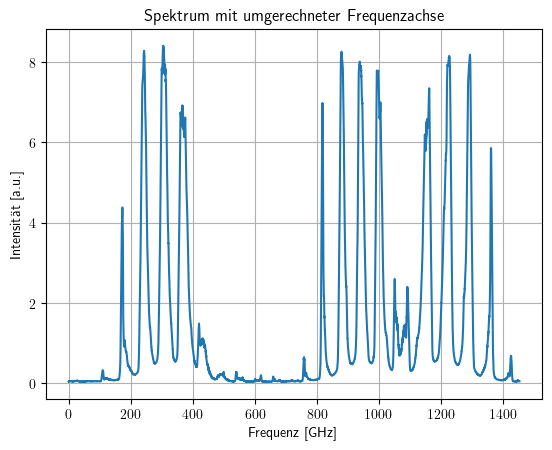

In [457]:
f_30_35_werte_shifted = f_30_35_werte - np.min(f_30_35_werte)

plt.plot(f_30_35_werte_shifted, U_30_35)  
plt.xlabel("Frequenz [GHz]")
plt.ylabel("Intensität [a.u.]")
plt.title("Spektrum mit umgerechneter Frequenzachse")
plt.grid(True)
plt.show()

In [458]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Beispiel für eine Gaussian-Funktion
def gauss(x, A, mu, sigma, c):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2)) + c

# Beispiel-Daten (ersetze dies mit deinen echten Daten)
# f_20_20_werte und U_20_20 sind die Frequenzen und Intensitäten
# f_20_20_werte_shifted = f_20_20_werte - np.min(f_20_20_werte)

# Liste von Intervallen, in denen gefittet werden soll (z.B. mehrere Bereiche)
intervals = [(200, 700), (700, 1400)]  # Beispiel-Intervalle

# Erstellen einer Figur für den Plot
plt.figure(figsize=(10, 6), constrained_layout=True)

# Schleife über die Intervalle
for start, end in intervals:
    # Maskieren der Daten im aktuellen Intervall
    mask = (f_30_35_werte_shifted >= start) & (f_30_35_werte_shifted <= end)
    x_fit = f_30_35_werte_shifted[mask]
    y_fit = U_30_35[mask]

    # Finden des höchsten Peaks im Intervall
    max_idx = np.argmax(y_fit)
    x_peak = x_fit[max_idx]
    y_peak = y_fit[max_idx]
    print(f"Höchster Peak im Intervall {start}-{end} GHz: {x_peak} GHz, Intensität: {y_peak}")

    # Startwerte für den Fit: Amplitude, Mittelwert, Sigma, Offset
    p0 = [y_peak - np.min(y_fit), x_peak, 5, np.min(y_fit)]

    # Fitten der Gauss-Funktion
    try:
        popt, _ = curve_fit(gauss, x_fit, y_fit, p0=p0)
        A, mu, sigma, c = popt
        fwhm = 2.3548 * abs(sigma)  # FWHM für Gauß

        # Ausgabe der Fit-Parameter
        print(f"Fit-Parameter für {start}-{end} GHz: μ = {mu:.1f} GHz, σ = {sigma:.1f}, FWHM = {fwhm:.1f}")

        # Plot für den aktuellen Fit
        plt.plot(x_fit, gauss(x_fit, *popt), label=f"Fit {start}-{end} GHz: μ={mu:.1f} GHz, FWHM={fwhm:.1f}")

    except RuntimeError:
        print(f"❌ Fit fehlgeschlagen im Intervall {start}-{end} GHz")

# Plot der Originaldaten
plt.plot(f_30_35_werte_shifted, U_30_35, label="Originaldaten", color='gray')

# Plot-Einstellungen
plt.xlabel("Frequenz [GHz]")
plt.ylabel("Intensität [a.u.]")
plt.title("Spektrum mit mehreren Gauß-Fits")
plt.grid(True)
plt.legend()
plt.show()


Höchster Peak im Intervall 200-700 GHz: 304.6126833045044 GHz, Intensität: 8.408905217
Fit-Parameter für 200-700 GHz: μ = 307.2 GHz, σ = 8.9, FWHM = 21.1
Höchster Peak im Intervall 700-1400 GHz: 878.6466958335766 GHz, Intensität: 8.2605067828
Fit-Parameter für 700-1400 GHz: μ = 880.4 GHz, σ = 5.4, FWHM = 12.7


RuntimeError: latex was not able to process the following string:
b'Fit 200-700 GHz: \\u03bc=307.2 GHz, FWHM=21.1'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpl_cldtwb a19220fa75a853044650f068a057e8b3.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./a19220fa75a853044650f068a057e8b3.tex
LaTeX2e <2022-11-01> patch level 1
L3 programming layer <2023-02-22>
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/article.cls
Document Class: article 2022/07/02 v1.4n Standard LaTeX document class
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2023/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2023/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/local/texlive/2023/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2023/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/local/texlive/2023/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/local/texlive/2023/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/local/texlive/2023/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/local/texlive/2023/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file a19220fa75a853044650f068a057e8b3.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips

! LaTeX Error: Unicode character μ (U+03BC)
               not set up for use with LaTeX.

See the LaTeX manual or LaTeX Companion for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.29 {\sffamily Fit 200-700 GHz: μ
                                   =307.2 GHz, FWHM=21.1}%
No pages of output.
Transcript written on tmpl_cldtwb/a19220fa75a853044650f068a057e8b3.log.




<Figure size 1000x600 with 1 Axes>

# Nachdem nun die Frequenzen der höchsten peaks bestimmt wurden plotte ich sie nun

### Plot für verschiedene Temperaturen, die Moden wurden in passende Farben markiert

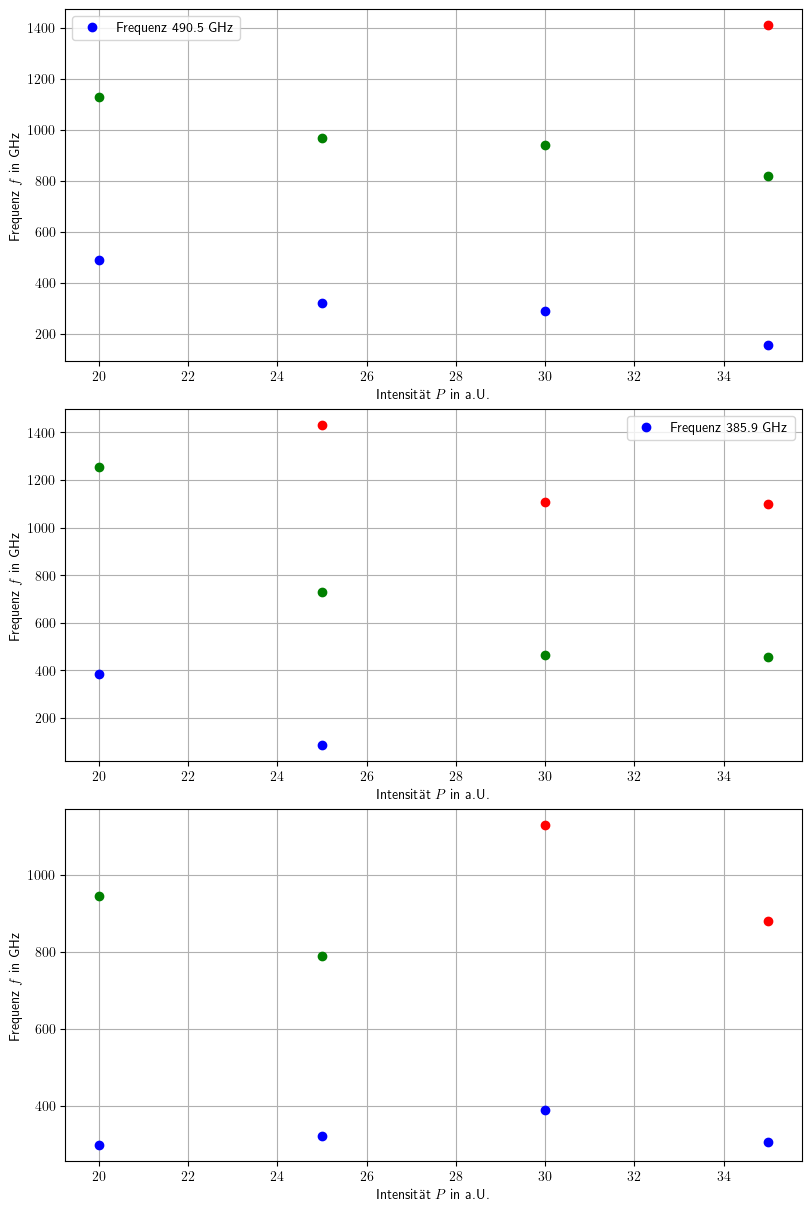

In [459]:
import numpy as np
import matplotlib.pyplot as plt

# Beispiel-Daten für jede Temperatur
temperatures = [20, 25, 30]  # Temperaturen in °C

f_20 = np.array([490.5, 1127.8, 319.6, 969.1, 287.9, 939.9, 154.9, 817.2, 1410.1])  # Frequenzen bei T = 20°C
f_25 = np.array([385.9, 1254.0, 85.8, 728.0, 1429.9, 466.7, 1106.4, 456.9, 1097.4])  # Frequenzen bei T = 25°C
f_30 = np.array([298.5, 944.9, 323.4, 790.0, 390.5, 1128.4, 307.2, 880.4])  # Frequenzen bei T = 30°C

# Intensitäten für jede Temperatur (Beispielwerte)
I_20 = np.array([20, 20, 25, 25, 30, 30, 35, 35, 35])
I_25 = np.array([20, 20, 25, 25, 25, 30, 30, 35, 35])
I_30 = np.array([20, 20, 25, 25, 30, 30, 35, 35])

# Farben definieren (jede Frequenz bekommt eine feste Farbe)
colors_20 = ['blue', 'green', 'blue', 'green', 'blue', 'green', 'blue', 'green', 'red']
colors_25 = ['blue', 'green', 'blue', 'green', 'red', 'green', 'red', 'green', 'red']
colors_30 = ['blue', 'green', 'blue', 'green', 'blue', 'red', 'blue', 'red']

# Erstellen von Subplots
fig, axs = plt.subplots(3, 1, figsize=(8, 12), constrained_layout=True)

# Funktion, um die Punkte mit den festen Farben zu plotten
def plot_with_fixed_colors(ax, I, f, colors):
    for i in range(len(f)):
        ax.plot(I[i], f[i], 'o', color=colors[i], label=f"Frequenz {f[i]} GHz" if i == 0 else "")

# Plot für T = 20°C
plot_with_fixed_colors(axs[0], I_20, f_20, colors_20)
#axs[0].set_title("Frequenzabhängigkeit bei T = 20°C")
axs[0].set_ylabel("Frequenz $f$ in GHz")
axs[0].set_xlabel("Intensität $P$ in a.U.")
axs[0].grid(True)
axs[0].legend()

# Plot für T = 25°C
plot_with_fixed_colors(axs[1], I_25, f_25, colors_25)
#axs[1].set_title("Frequenzabhängigkeit bei T = 25°C")
axs[1].set_ylabel("Frequenz $f$ in GHz")
axs[1].set_xlabel("Intensität $P$ in a.U.")
axs[1].grid(True)
axs[1].legend()

# Plot für T = 30°C
plot_with_fixed_colors(axs[2], I_30, f_30, colors_30)
#axs[2].set_title("Frequenzabhängigkeit bei T = 30°C")
axs[2].set_ylabel("Frequenz $f$ in GHz")
axs[2].set_xlabel("Intensität $P$ in a.U.")
axs[2].grid(True)
#axs[2].legend()

# Plot anzeigen
plt.show()


## Nun werden die linearen Fits angelegt 

/Users/zarahaigner/Library/Python/3.9/lib/python/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Users/zarahaigner/Library/Python/3.9/lib/python/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/zarahaigner/Library/Python/3.9/lib/python/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


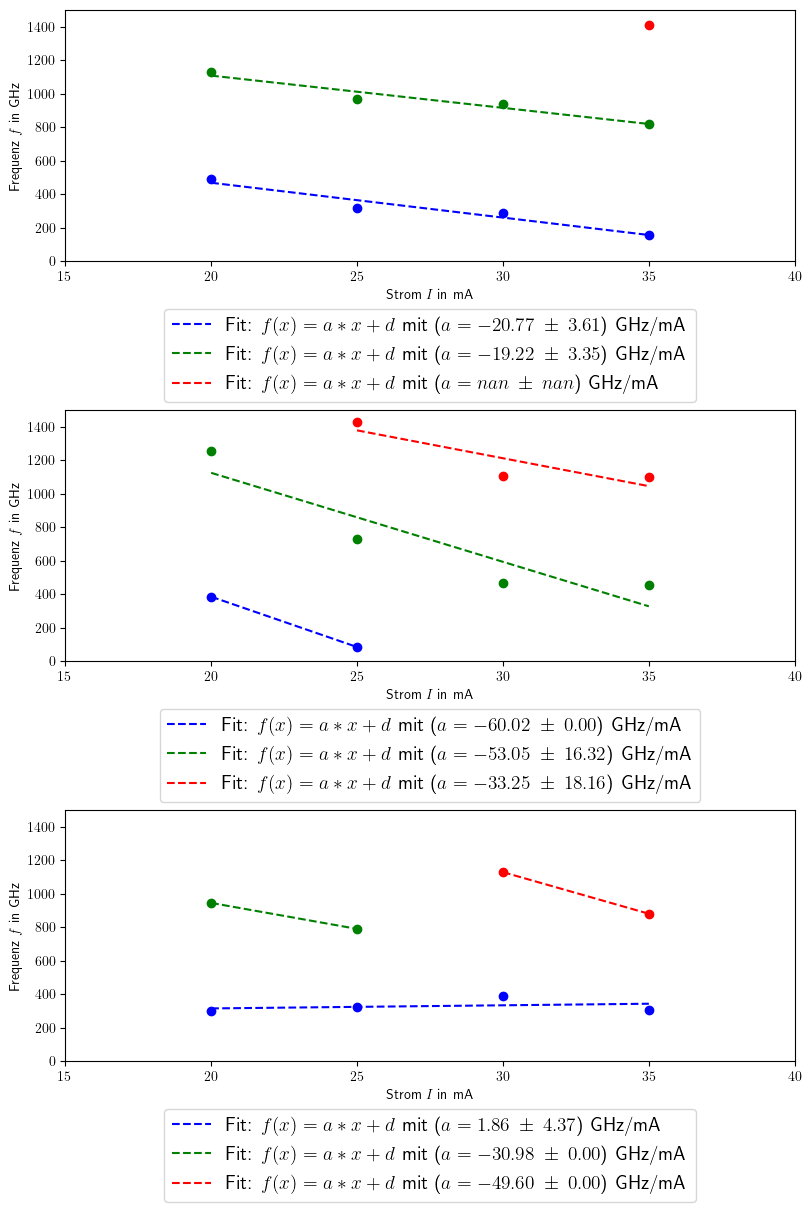

In [460]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Beispiel-Daten für jede Temperatur
temperatures = [20, 25, 30]  # Temperaturen in °C

f_20 = np.array([490.5, 1127.8, 319.6, 969.1, 287.9, 939.9, 154.9, 817.2, 1410.1])  # Frequenzen bei T = 20°C
f_25 = np.array([385.9, 1254.0, 85.8, 728.0, 1429.9, 466.7, 1106.4, 456.9, 1097.4])  # Frequenzen bei T = 25°C
f_30 = np.array([298.5, 944.9, 323.4, 790.0, 390.5, 1128.4, 307.2, 880.4])  # Frequenzen bei T = 30°C

# Intensitäten für jede Temperatur (Beispielwerte)
I_20 = np.array([20, 20, 25, 25, 30, 30, 35, 35, 35])
I_25 = np.array([20, 20, 25, 25, 25, 30, 30, 35, 35])
I_30 = np.array([20, 20, 25, 25, 30, 30, 35, 35])

# Farben definieren (jede Frequenz bekommt eine feste Farbe)
colors_20 = ['blue', 'green', 'blue', 'green', 'blue', 'green', 'blue', 'green', 'red']
colors_25 = ['blue', 'green', 'blue', 'green', 'red', 'green', 'red', 'green', 'red']
colors_30 = ['blue', 'green', 'blue', 'green', 'blue', 'red', 'blue', 'red']

# Erstellen von Subplots
fig, axs = plt.subplots(3, 1, figsize=(8, 12), constrained_layout=True)

# Funktion, um die Punkte mit den festen Farben zu plotten und die linearen Fits hinzuzufügen
def plot_with_fits(ax, I, f, colors):
    for i in range(len(f)):
        ax.plot(I[i], f[i], 'o', color=colors[i])
        
    # Fitting für jede Farbe (feste Farben)
    #legend_entries = []
    unique_colors = set(colors)
    for color in unique_colors:
        # Filtere Punkte mit dieser Farbe
        mask = np.array(colors) == color
        I_filtered = I[mask]
        f_filtered = f[mask]
        
        # Lineare Regression
        slope, intercept, _, _, stderr = linregress(I_filtered, f_filtered)
        x_vals = np.linspace(min(I_filtered), max(I_filtered), 100)
        y_vals = slope * x_vals + intercept
        
        # Plot für den linearen Fit
        ax.plot(I_filtered, slope * I_filtered + intercept, color=color, linestyle='--', label=f"Fit: $f(x)=a*x + d$ mit ($a={slope:.2f}\: \pm \:{stderr:.2f}$) GHz/mA")
        #eq_str = fr"$f(x) = {slope:.2f} \cdot x + {intercept:.2f}$" + f"\n$a = {slope:.2f} \pm {stderr:.2f}$"
        #legend_entries.append((color, eq_str))
        # Fitting über alle Datenpunkte
        #I_all = np.concatenate([I_20, I_25, I_30])
        #f_all = np.concatenate([f_20, f_25, f_30])
        #slope_all, intercept_all, _, _, _ = linregress(I_all, f_all)

        # Plot für den linearen Fit über alle Daten
        #ax.plot(I_all, slope_all * I_all + intercept_all, color='black', linestyle='-', label=f"Fit über alle Daten (a={slope_all:.2f})")
        #return legend_entries
#fig, axs = plt.subplots(3, 1, figsize=(8, 14), constrained_layout=True)
#legend_boxes = []
#plt.xlim(15,40)
#plt.ylim(0, 1400)

# Plot für T = 20°C
#legend_20 = plot_with_fits(axs[0], I_20, f_20, colors_20)
plot_with_fits(axs[0], I_20, f_20, colors_20)
#axs[0].set_title("Frequenzabhängigkeit bei T = 20°C")
axs[0].set_ylabel("Frequenz $f$ in GHz")
axs[0].set_xlabel("Strom $I$ in mA")
axs[0].grid(False)
#legend_boxes.append(legend_20)
axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fontsize=14, frameon=True)


# Plot für T = 25°C
#legend_25 = plot_with_fits(axs[1], I_25, f_25, colors_25)
plot_with_fits(axs[1], I_25, f_25, colors_25)
#axs[1].set_title("Frequenzabhängigkeit bei T = 25°C")
axs[1].set_ylabel("Frequenz $f$ in GHz")
axs[1].set_xlabel("Strom $I$ in mA")
axs[1].grid(False)
#legend_boxes.append(legend_25)
axs[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fontsize=14, frameon=True)

# Plot für T = 30°C
plot_with_fits(axs[2], I_30, f_30, colors_30)
#axs[2].set_title("Frequenzabhängigkeit bei T = 30°C")
#legend_30 = plot_with_fits(axs[2], I_30, f_30, colors_30)
axs[2].set_ylabel("Frequenz $f$ in GHz")
axs[2].set_xlabel("Strom $I$ in mA")
axs[2].grid(False)
axs[2].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fontsize=14, frameon=True)
#legend_boxes.append(legend_30)

# Plot anzeigen
#for ax, legends in zip(axs, legend_boxes):
#    handles = [plt.Line2D([0], [0], color=color, linestyle='--') for color, _ in legends]
#    labels = [label for _, label in legends]
#    ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.25), frameon=True, ncol=1)
# Nach allen Subplot-Einstellungen
for ax in axs:
    ax.set_xlim(15, 40)
    ax.set_ylim(0,1500)


plt.show()


## Aus den Fits lässt sich die Verstimmbarkeit a bestimmen, es wird anschließend der Mittelwert der Werte für a berechent

### T = 20

In [461]:
a_1_20 = -20.77
a_2_20 = -19.22

a_avg_20 = (a_1_20 + a_2_20)/2
a_error_20 = np.sqrt(3.61**2 + 3.35**2)

print(a_avg_20)
print(a_error_20)

-19.994999999999997
4.924895937986913


### T = 25

In [462]:
a_1_25 = -60.02
a_2_25 = -53.05
a_3_25 = -33.25

a_avg_25 = (a_1_25 + a_2_25 + a_3_25) / 3
a_error_25 = np.sqrt(16.32**2 + 18.16**2)
print(a_avg_25)
print(a_error_25)

-48.77333333333333
24.41573263287424


### T = 30

In [463]:
a_1_30 = 1.86
a_2_30 = -2.39

a_2_avg = (a_1_30 + a_2_30) / 2
a_error_30 = np.sqrt(4.37**2)

print(a_2_avg)
print(a_error_30)

-0.265
4.37


## Berechnung der Fits in Abhängigkeit der Temperatur

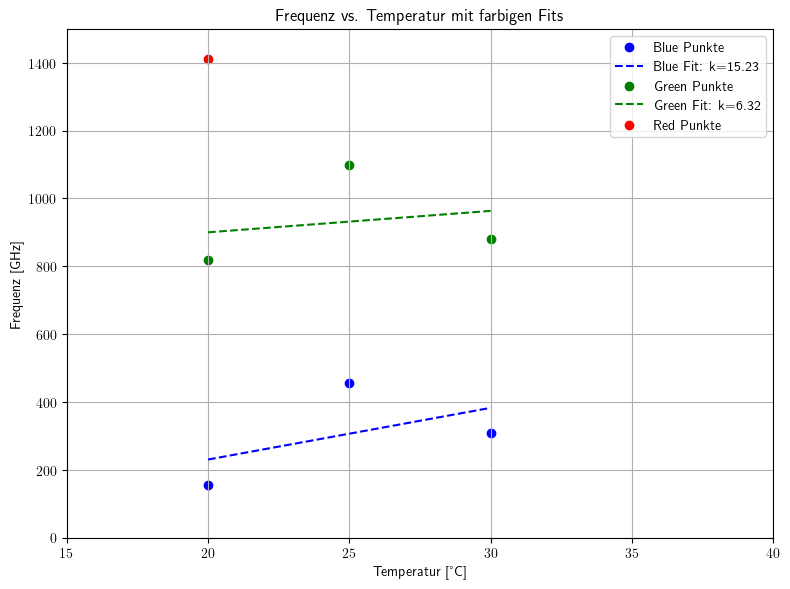

'\n# Intensitäten für jede Temperatur (Beispielwerte)\n#I_20 = np.array([20, 20, 25, 25, 30, 30, 35, 35, 35])\n#I_25 = np.array([20, 20, 25, 25, 25, 30, 30, 35, 35])\n#I_30 = np.array([20, 20, 25, 25, 30, 30, 35, 35])\n\n# Farben definieren (jede Frequenz bekommt eine feste Farbe)\n#colors_20 = [\'blue\', \'green\', \'blue\', \'green\', \'blue\', \'green\', \'blue\', \'green\', \'red\']\n#colors_25 = [\'blue\', \'green\', \'blue\', \'green\', \'red\', \'green\', \'red\', \'green\', \'red\']\n#colors_30 = [\'blue\', \'green\', \'blue\', \'green\', \'blue\', \'red\', \'blue\', \'red\']\ncolors = [\'blue\', \'green\', \'red\', \'blue\', \'green\', \'blue\', \'green\']\n\n# Erstellen von Subplots\n#fig, axs = plt.subplots(3, 1, figsize=(8, 12), constrained_layout=True)\n\n# Funktion, um die Punkte mit den festen Farben zu plotten und die linearen Fits hinzuzufügen\ndef plot_with_fits(ax, I, f, colors):\n    for i in range(len(f)):\n        ax.plot(I[i], f[i], \'o\', color=colors[i], label=

In [464]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Beispiel-Daten für jede Temperatur
#temperatures = [20, 25, 30]  # Temperaturen in °C

#f_20 = np.array([490.5, 1127.8, 319.6, 969.1, 287.9, 939.9, 154.9, 817.2, 1410.1])  # Frequenzen bei T = 20°C
#f_25 = np.array([385.9, 1254.0, 85.8, 728.0, 1429.9, 466.7, 1106.4, 456.9, 1097.4])  # Frequenzen bei T = 25°C
#f_30 = np.array([298.5, 944.9, 323.4, 790.0, 390.5, 1128.4, 307.2, 880.4])  # Frequenzen bei T = 30°C

f_T = np.array([154.9, 817.2, 1410.1, 456.9, 1097.4, 307.2, 880.4])
T = np.array([20, 20, 20, 25, 25, 30, 30])
colors = ['blue', 'green', 'red', 'blue', 'green', 'blue', 'green']


# Einzigartige Farben identifizieren
unique_colors = sorted(set(colors), key=colors.index)  # Reihenfolge beibehalten

# Plot vorbereiten
plt.figure(figsize=(8, 6))
for color in unique_colors:
    # Maske für aktuelle Farbe
    mask = np.array(colors) == color
    x = T[mask]
    y = f_T[mask]
    
    # Punkte plotten
    plt.scatter(x, y, color=color, label=f"{color.capitalize()} Punkte")
    
    # Lineare Regression durchführen
    if len(x) >= 2:
        slope, intercept, *_ = linregress(x, y)
        x_fit = np.linspace(min(x), max(x), 100)
        y_fit = slope * x_fit + intercept
        plt.plot(x_fit, y_fit, linestyle='--', color=color,
                 label=f"{color.capitalize()} Fit: k={slope:.2f}")

# Bereich eingrenzen
plt.xlim(15, 40)
plt.ylim(0, 1500)
# Plot formatieren
plt.xlabel("Temperatur [°C]")
plt.ylabel("Frequenz [GHz]")
plt.title("Frequenz vs. Temperatur mit farbigen Fits")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

"""
# Intensitäten für jede Temperatur (Beispielwerte)
#I_20 = np.array([20, 20, 25, 25, 30, 30, 35, 35, 35])
#I_25 = np.array([20, 20, 25, 25, 25, 30, 30, 35, 35])
#I_30 = np.array([20, 20, 25, 25, 30, 30, 35, 35])

# Farben definieren (jede Frequenz bekommt eine feste Farbe)
#colors_20 = ['blue', 'green', 'blue', 'green', 'blue', 'green', 'blue', 'green', 'red']
#colors_25 = ['blue', 'green', 'blue', 'green', 'red', 'green', 'red', 'green', 'red']
#colors_30 = ['blue', 'green', 'blue', 'green', 'blue', 'red', 'blue', 'red']
colors = ['blue', 'green', 'red', 'blue', 'green', 'blue', 'green']

# Erstellen von Subplots
#fig, axs = plt.subplots(3, 1, figsize=(8, 12), constrained_layout=True)

# Funktion, um die Punkte mit den festen Farben zu plotten und die linearen Fits hinzuzufügen
def plot_with_fits(ax, I, f, colors):
    for i in range(len(f)):
        ax.plot(I[i], f[i], 'o', color=colors[i], label=f"Frequenz {f[i]} GHz" if i == 0 else "")
        
    # Fitting für jede Farbe (feste Farben)
    unique_colors = set(colors)
    for color in unique_colors:
        # Filtere Punkte mit dieser Farbe
        mask = np.array(colors) == color
        I_filtered = I[mask]
        f_filtered = f[mask]
        
        # Lineare Regression
        slope, intercept, _, _, _ = linregress(I_filtered, f_filtered)
        
        # Plot für den linearen Fit
        ax.plot(I_filtered, slope * I_filtered + intercept, color=color, linestyle='--', label=f"Fit {color} (a={slope:.2f})")

        # Fitting über alle Datenpunkte
        #I_all = np.concatenate([I_20, I_25, I_30])
        #f_all = np.concatenate([f_20, f_25, f_30])
        #slope_all, intercept_all, _, _, _ = linregress(I_all, f_all)

        # Plot für den linearen Fit über alle Daten
        #ax.plot(I_all, slope_all * I_all + intercept_all, color='black', linestyle='-', label=f"Fit über alle Daten (a={slope_all:.2f})")


# Plot für T = 20°C
plot_with_fits(axs[0], I_20, f_20, colors_20)
axs[0].set_title("Frequenzabhängigkeit bei T = 20°C")
axs[0].set_ylabel("Frequenz [GHz]")
axs[0].set_xlabel("Intensität [a.u.]")
axs[0].grid(True)
axs[0].legend()

# Plot für T = 25°C
plot_with_fits(axs[1], I_25, f_25, colors_25)
axs[1].set_title("Frequenzabhängigkeit bei T = 25°C")
axs[1].set_ylabel("Frequenz [GHz]")
axs[1].set_xlabel("Intensität [a.u.]")
axs[1].grid(True)
axs[1].legend()

# Plot für T = 30°C
plot_with_fits(axs[2], I_30, f_30, colors_30)
axs[2].set_title("Frequenzabhängigkeit bei T = 30°C")
axs[2].set_ylabel("Frequenz [GHz]")
axs[2].set_xlabel("Intensität [a.u.]")
axs[2].grid(True)
axs[2].legend()

# Plot anzeigen
plt.show()
"""

## Negativ "erzwungender" Fit

## der fehler für k wurde über die methode der kleinsten quadrate berechnet -> großer pfusch dieser linearer fit -> ist eigentlich kein fit

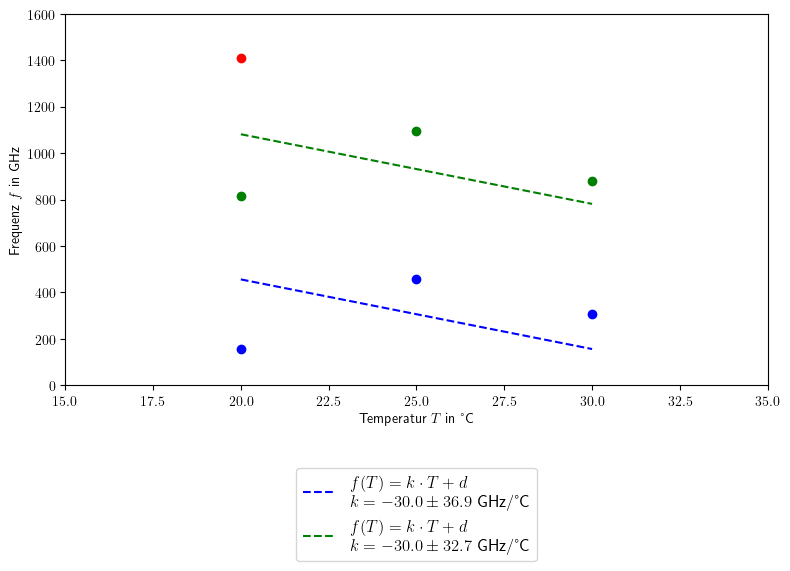

In [465]:
import numpy as np
import matplotlib.pyplot as plt

# Deine Daten
f_T = np.array([154.9, 817.2, 1410.1, 456.9, 1097.4, 307.2, 880.4])
T = np.array([20, 20, 20, 25, 25, 30, 30])
colors = ['blue', 'green', 'red', 'blue', 'green', 'blue', 'green']

# Einzigartige Farben
unique_colors = sorted(set(colors), key=colors.index)

plt.figure(figsize=(8, 6))

for color in unique_colors:
    mask = np.array(colors) == color
    x = T[mask]
    y = f_T[mask]
    plt.scatter(x, y, color=color)

    if len(x) >= 2:
        # Vorgegebene Steigung
        k = -30

        # Achsenabschnitt so, dass die Gerade durch den Mittelwert geht
        x_mean = np.mean(x)
        y_mean = np.mean(y)
        d = y_mean - k * x_mean

        # Residuen berechnen
        y_fit = k * x + d
        residuals = y - y_fit

        # Fehlerabschätzung für k
        N = len(x)
        delta_k = np.sqrt(np.sum(residuals**2) / ((N - 1) * np.sum((x - x_mean)**2)))

        # Fit zeichnen
        x_fit = np.linspace(min(x), max(x), 100)
        y_fit = k * x_fit + d
        label = (f"$f(T) = k \\cdot T + d$\n"
                 f"$k = {k:.1f} \pm {delta_k:.1f}$ GHz/°C")
        plt.plot(x_fit, y_fit, linestyle='--', color=color, label=label)

# Plot verschönern
plt.xlabel("Temperatur $T$ in °C")
plt.ylabel("Frequenz $f$ in GHz")
plt.xlim(15, 35)
plt.ylim(0, 1600)
plt.grid(False)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fontsize=12, frameon=True)
plt.tight_layout()
plt.show()
